In [1]:
using CairoMakie
using LilGuys
using Arya

In [2]:
modelsdir = ENV["DWARFS_ROOT"] * "/analysis/"

"/cosma/home/durham/dc-boye1/data/dwarfs/analysis/"

In [3]:
using DataFrames, CSV

In [4]:
"""
    load_orbit(filename)

"""
function load_orbit(filename)
    out = Output(joinpath(modelsdir, filename))

    df = DataFrame(
        time = out.times * T2GYR, 
        x = out.x_cen[1, :],
        y = out.x_cen[2, :],
        z = out.x_cen[3, :],
        v_x = out.v_cen[1, :] * V2KMS,
        v_y = out.v_cen[2, :] * V2KMS,
        v_z = out.v_cen[3, :] * V2KMS,
        )

    df[!, :R] = @. sqrt(df.x^2 + df.y^2)
    df[!, :r] = @.sqrt(df.x^2 + df.y^2 + df.z^2)
    return df
end

load_orbit

In [5]:
"""
    load_orbit_expected(filename)

"""
function load_orbit_expected(filename)
    path = joinpath(modelsdir, "../simulations/", filename)
    df = CSV.read(path, DataFrame)

    df[!, :R] = @. sqrt(df.x^2 + df.y^2)
    df[!, :r] = @.sqrt(df.x^2 + df.y^2 + df.z^2)
    df[!, :time] = df.t * T2GYR

    return df
end

load_orbit_expected

In [6]:
function compare_orbits_2d(orbits; xname = "x", yname = "y", xunits = "kpc", yunits="kpc",
        aspect=DataAspect(), kwargs...
    )
    fig = Figure()
    
    ax = Axis(fig[1, 1];
        xlabel = "$xname / $xunits",
        ylabel = "$yname / $yunits", 
        aspect=aspect,
        kwargs...
    )
    
    for (label, orbit) in orbits
        x = orbit[:, Symbol(xname)]
        y = orbit[:, Symbol(yname)]
        lines!(x, y, label = label)

    end

    Legend(fig[1, 2], ax)

    fig
end

compare_orbits_2d (generic function with 1 method)

In [11]:
function compare_orbits(orbits; limits=100)
    compare_orbits_2d(orbits, yname="x", xname="y", limits=(-limits,limits,-limits,limits)) |> display
    compare_orbits_2d(orbits, yname="y", xname="z", limits=(-limits,limits,-limits,limits)) |> display
    compare_orbits_2d(orbits, yname="x", xname="z", limits=(-limits,limits,-limits,limits)) |> display
    compare_orbits_2d(orbits, yname="r", xname="time", aspect=nothing, xunits="Gyr", limits=(nothing, nothing, 0, limits))  |> display
end

compare_orbits (generic function with 1 method)

# smallperi orbit

In [8]:
CairoMakie.activate!(type=:svg, px_per_unit=2)

In [9]:
orbits = [
    "1e5.1" => load_orbit("sculptor/1e5_new_v31_r3.2/L3M11_9Gyr_smallperi.1/"),
    "1e5.2" => load_orbit("sculptor/1e5_new_v31_r3.2/L3M11_9Gyr_smallperi.2/"),
    "expected" => load_orbit_expected("sculptor/1e4_new_v31_r3.2/L3M11_9Gyr_smallperi.1/orbit.csv"),
    ];

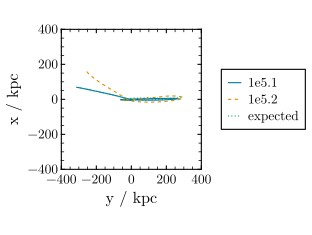

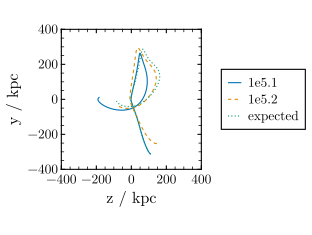

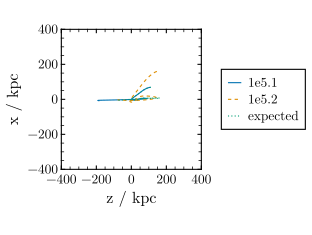

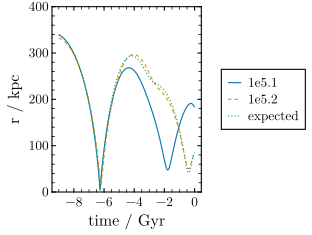

CairoMakie.Screen{SVG}


In [12]:
compare_orbits(orbits, limits=400)

In [51]:
orbits = [
    "1e6" => load_orbit("sculptor/1e6_new_v31_r3.2/L3M11_9Gyr_smallperi/"),
    "1e5.1" => load_orbit("sculptor/1e5_new_v31_r3.2/L3M11_9Gyr_smallperi.1/"),
    "1e4.1" => load_orbit("sculptor/1e4_new_v31_r3.2/L3M11_9Gyr_smallperi.1/"),
    ];

In [52]:
[orbit.second[end, :] for orbit in orbits]


3-element Vector{DataFrameRow{DataFrame, DataFrames.Index}}:
 DataFrameRow
 Row │ time     x         y        z         v_x       v_y      v_z      R     ⋯
     │ Float64  Float64   Float64  Float64   Float64   Float64  Float64  Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
 192 │     0.0  -7.43163   13.281  -180.172  -6.89399  69.0228  66.6323  15.21 ⋯
                                                               2 columns omitted
 DataFrameRow
 Row │ time     x         y        z         v_x       v_y      v_z      R     ⋯
     │ Float64  Float64   Float64  Float64   Float64   Float64  Float64  Float ⋯
─────┼──────────────────────────────────────────────────────────────────────────
 192 │     0.0  -8.05828  13.0722  -182.067  -7.49572  65.2564  71.7649  15.35 ⋯
                                                               2 columns omitted
 DataFrameRow
 Row │ time     x        y        z         v_x       v_y      v_z      R      ⋯
     │

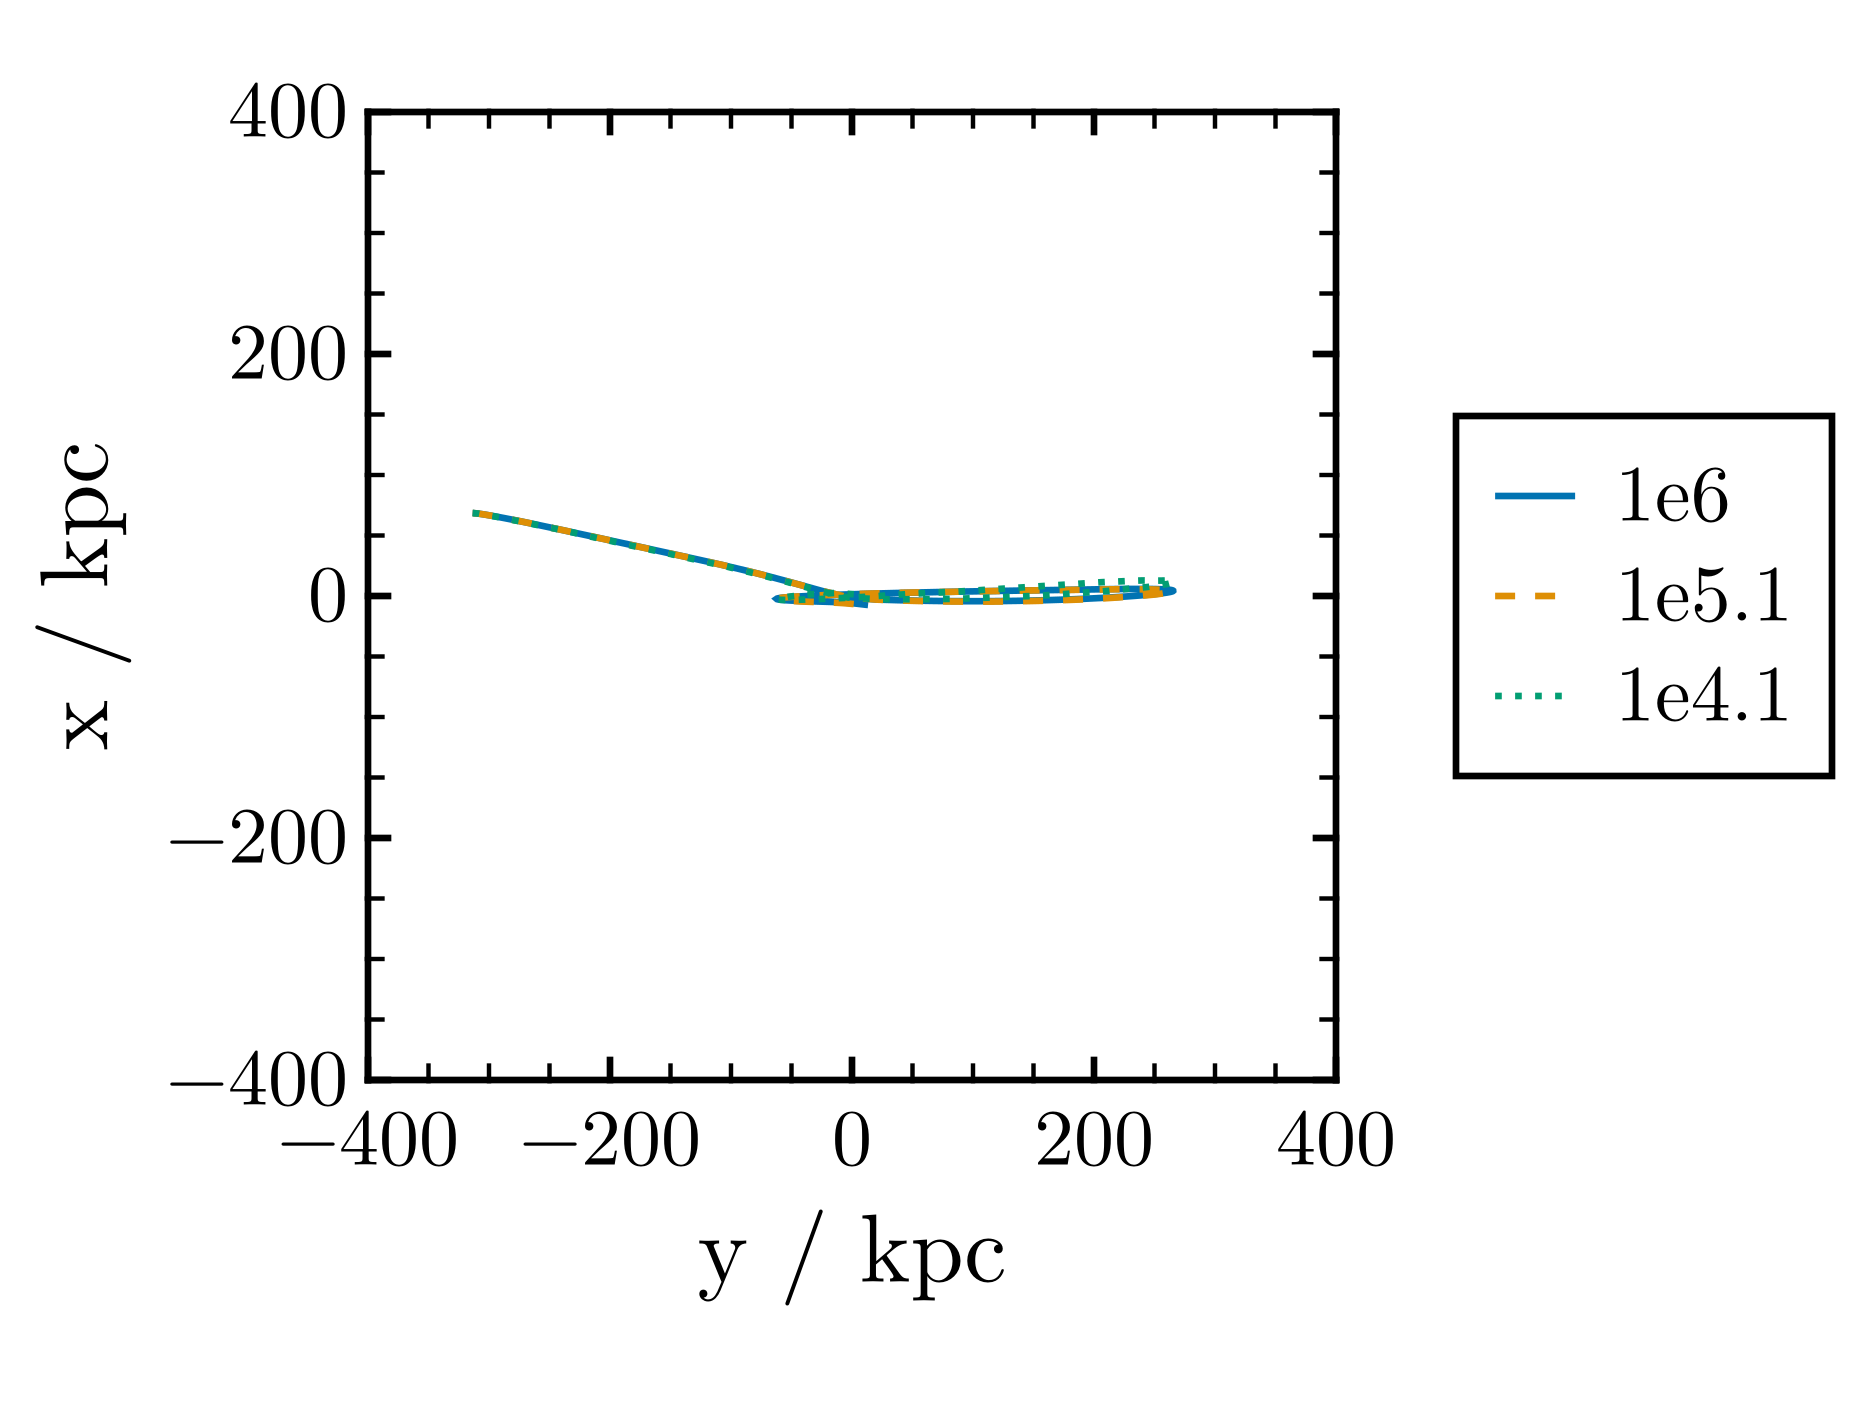

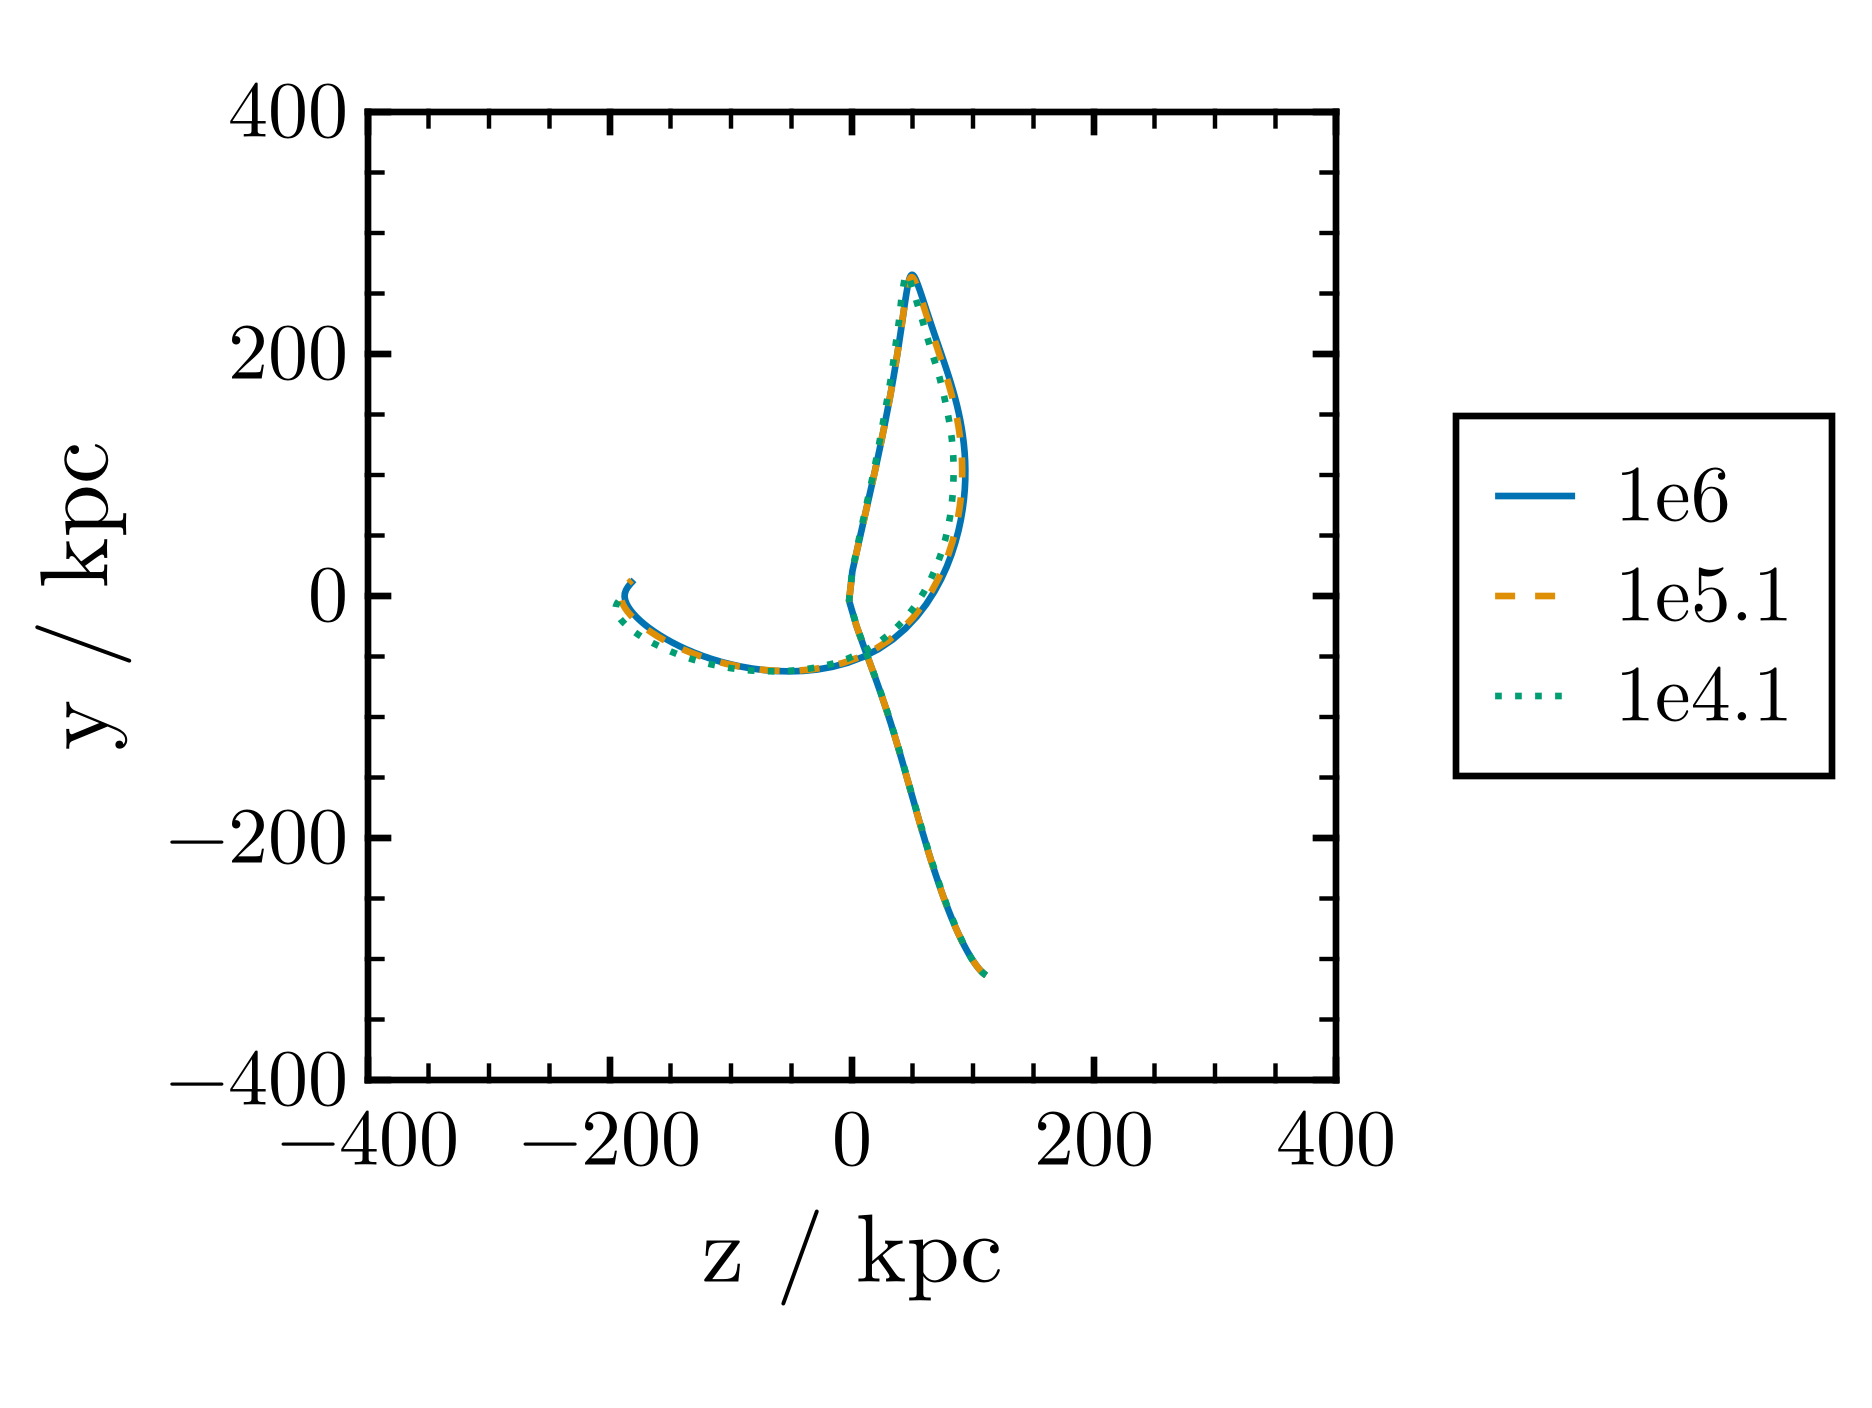

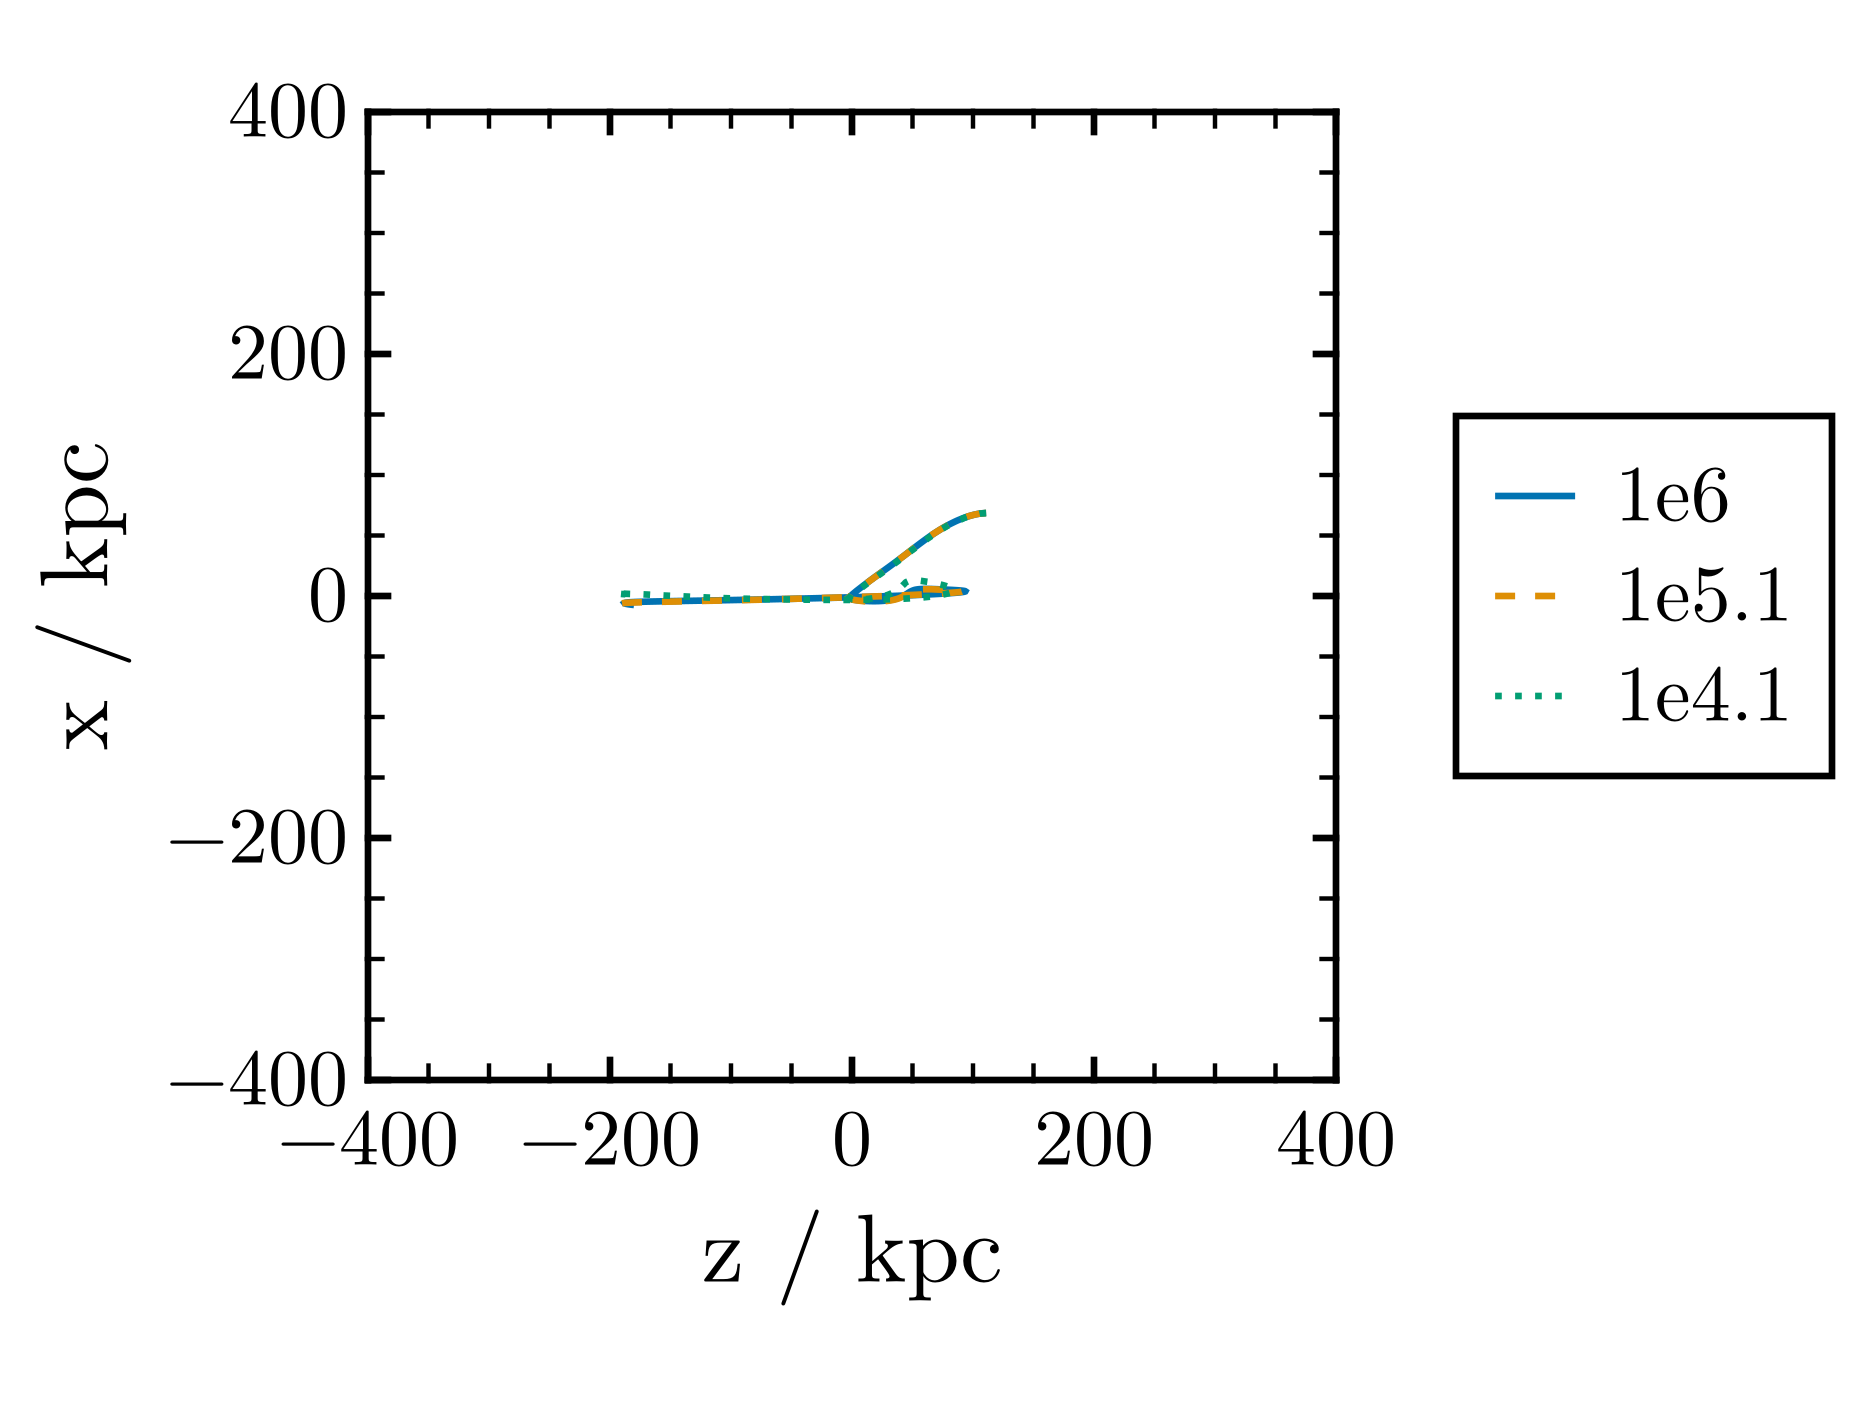

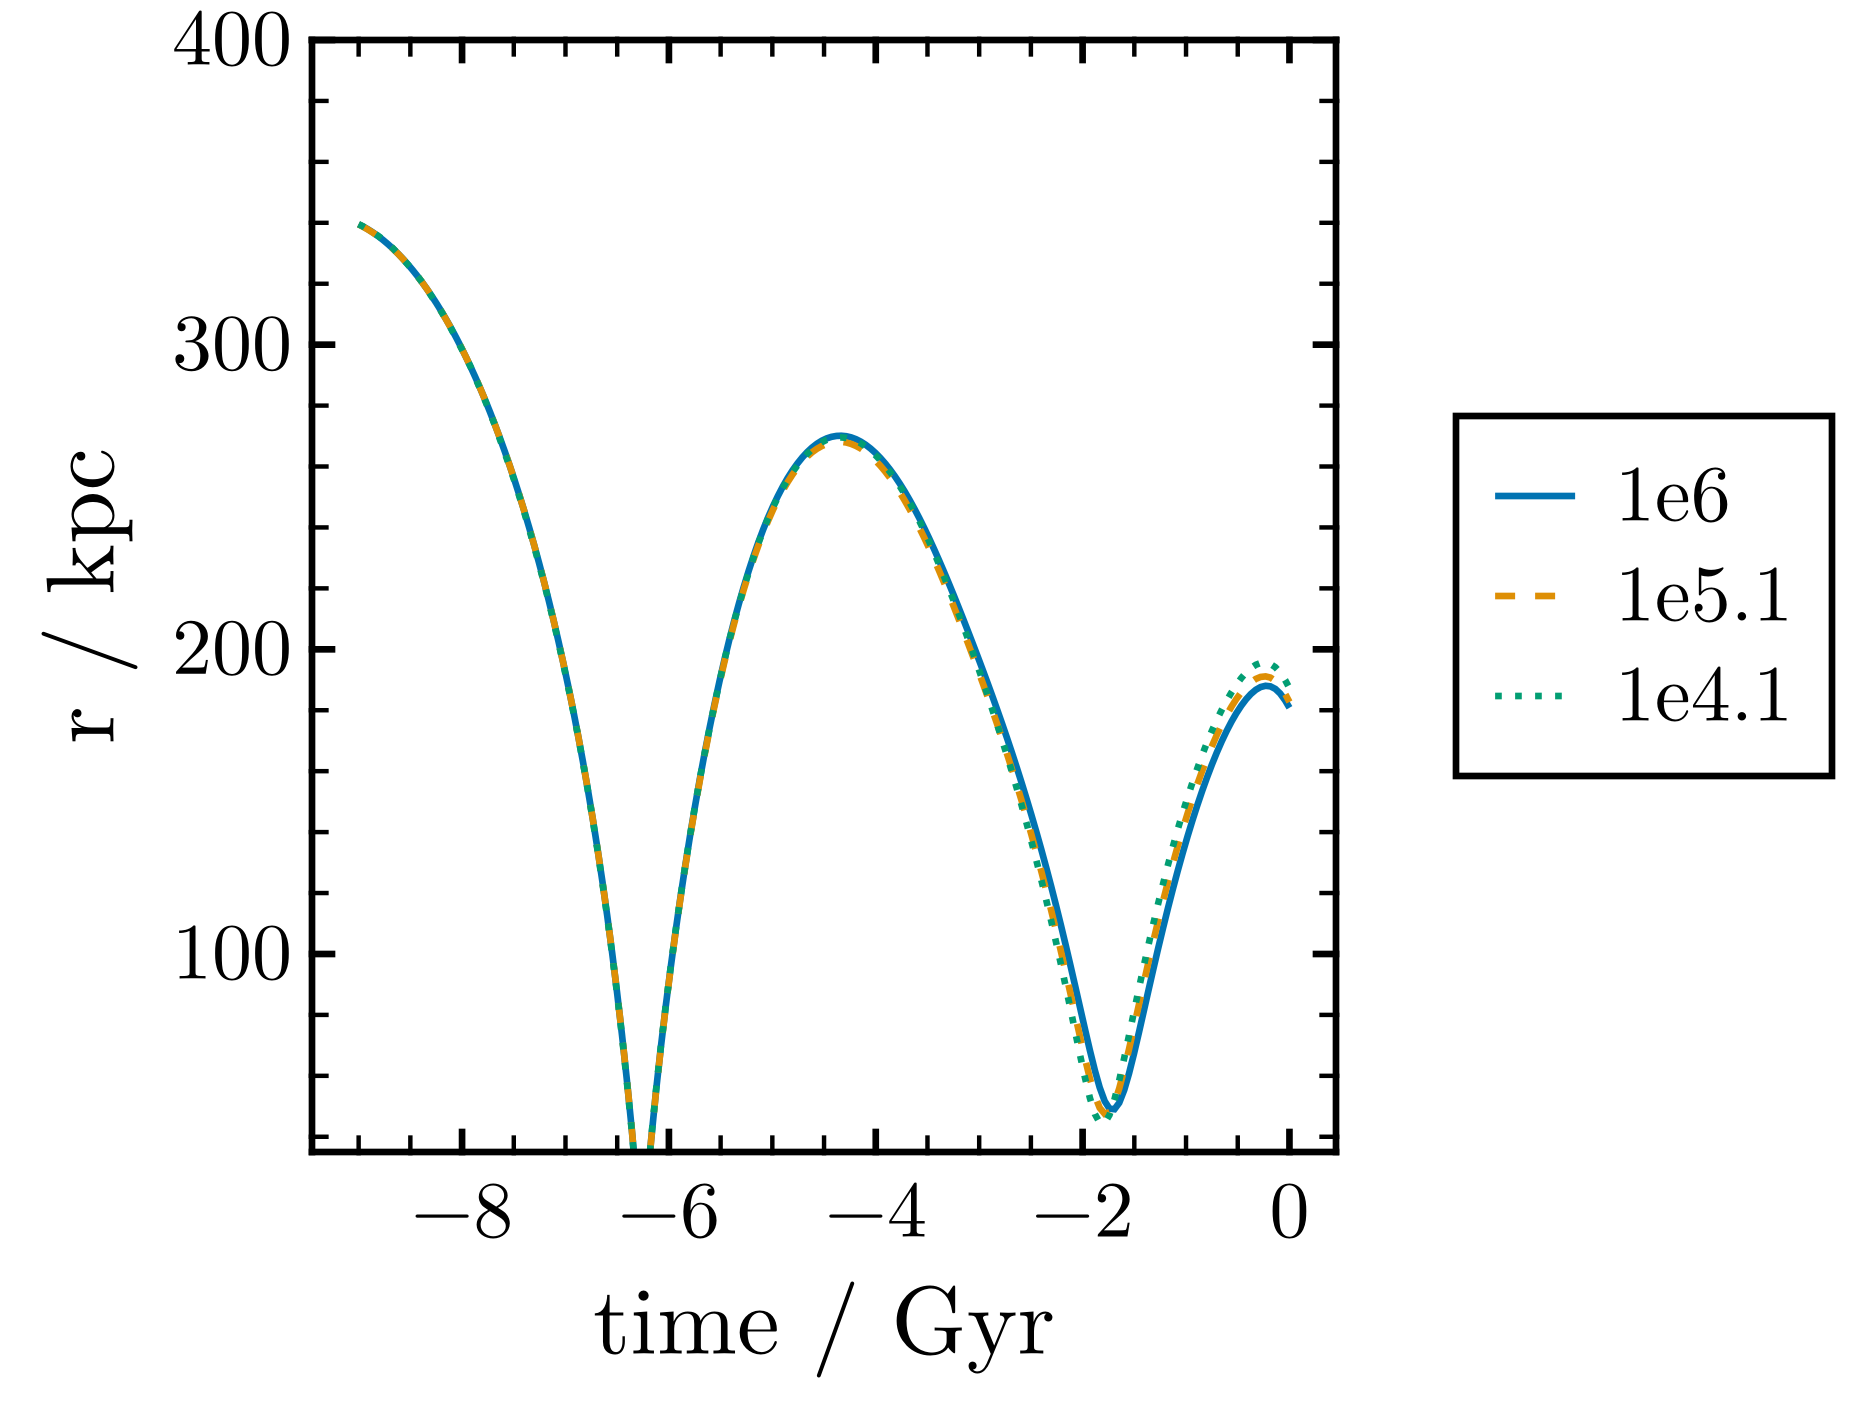

CairoMakie.Screen{IMAGE}


In [39]:
compare_orbits(orbits, limits=400)

In [53]:
orbits = [
    "cen" => load_orbit("sculptor/1e5_new_v31_r3.2/L3M11_9Gyr_smallperi.1/"),
    "dR" => load_orbit("sculptor/1e5_new_v31_r3.2/L3M11_9Gyr_smallperi.1_R/"),
    "dz" => load_orbit("sculptor/1e5_new_v31_r3.2/L3M11_9Gyr_smallperi.1_z/"),
];

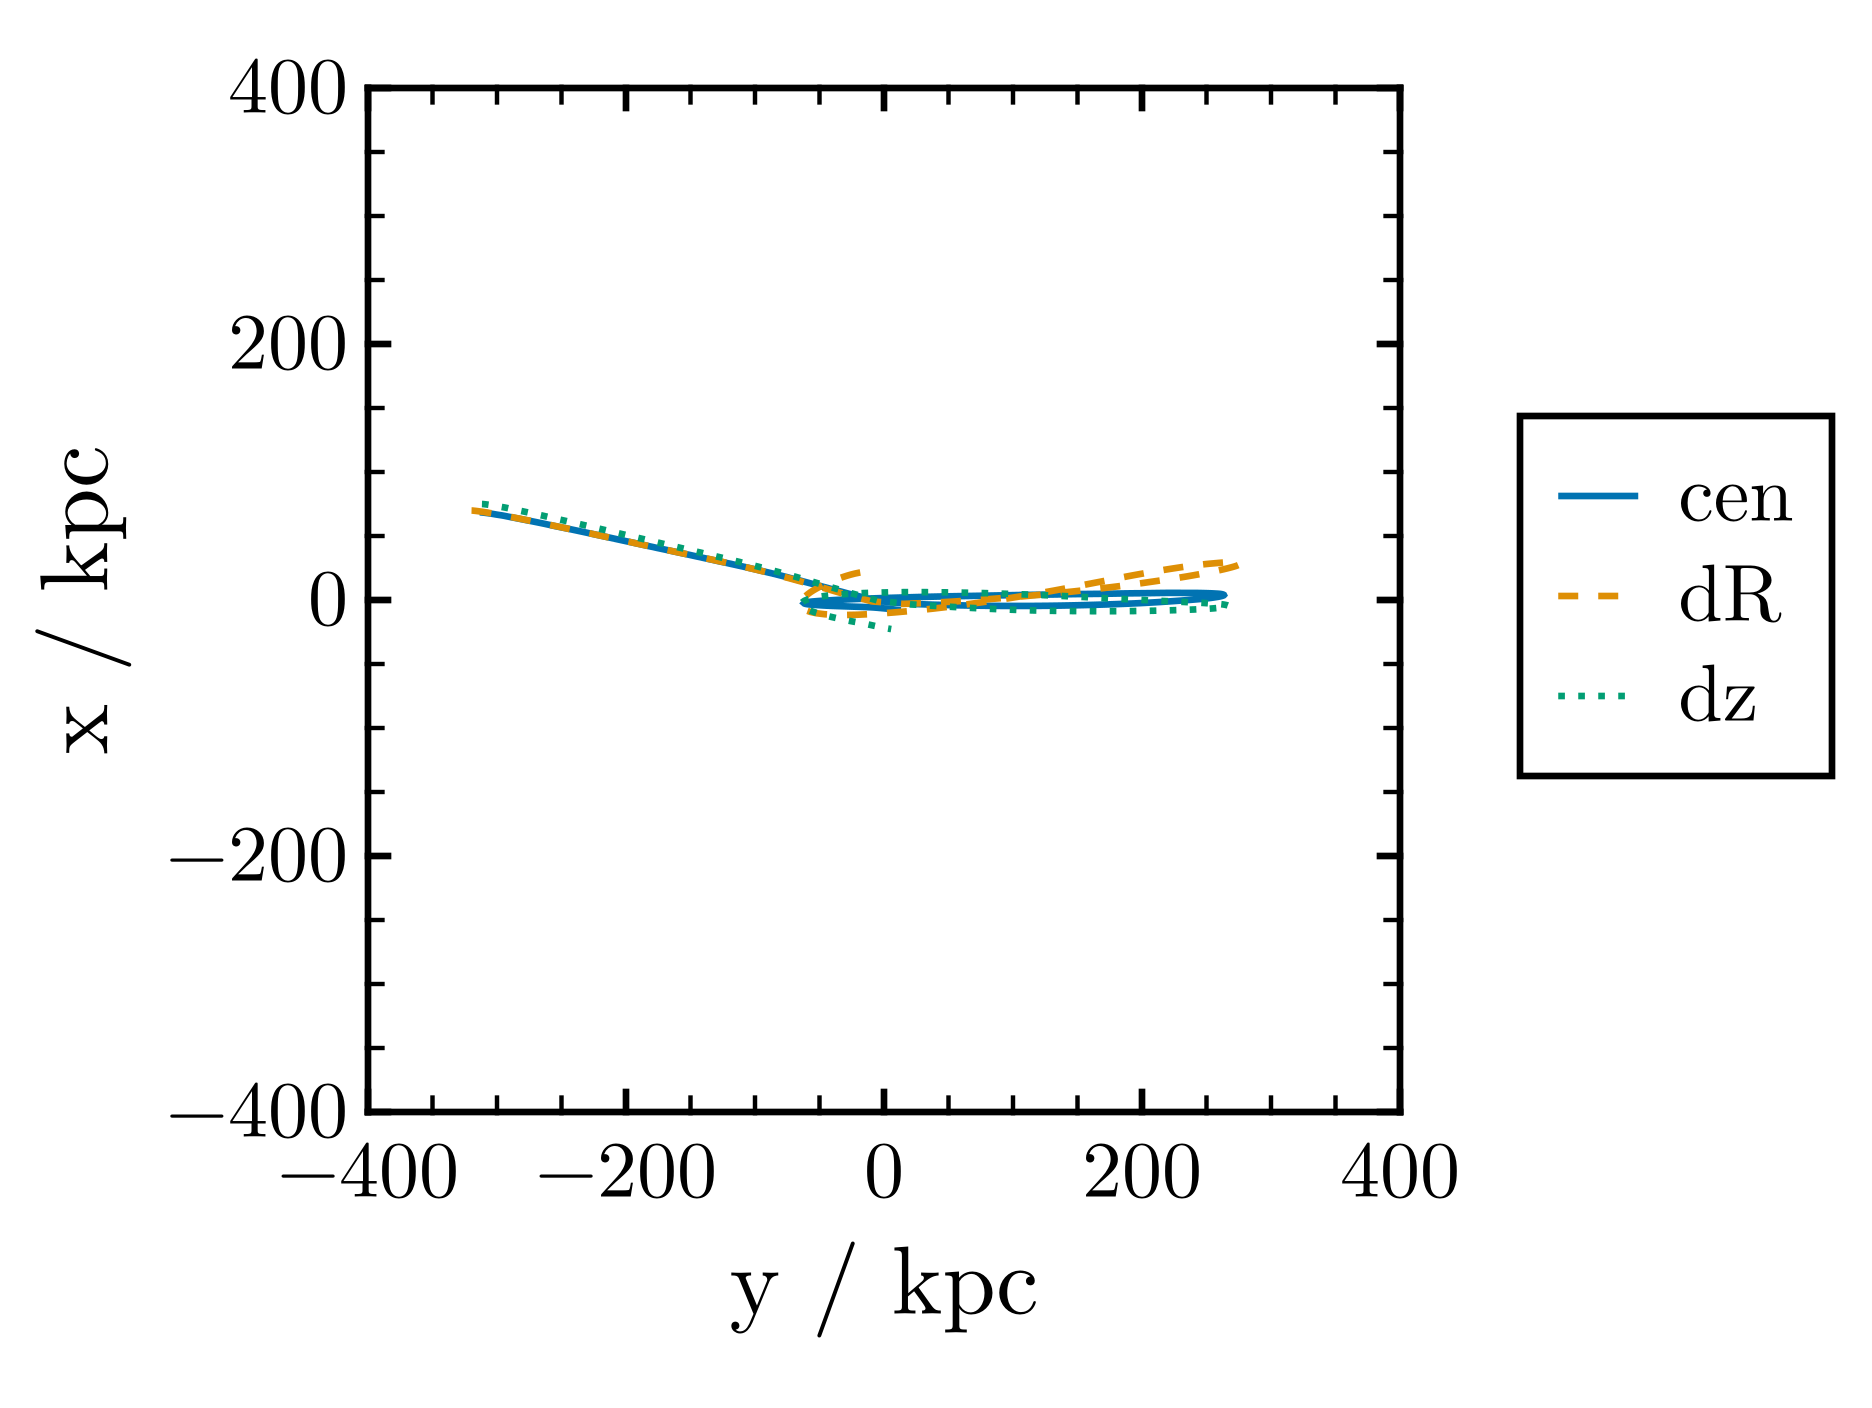

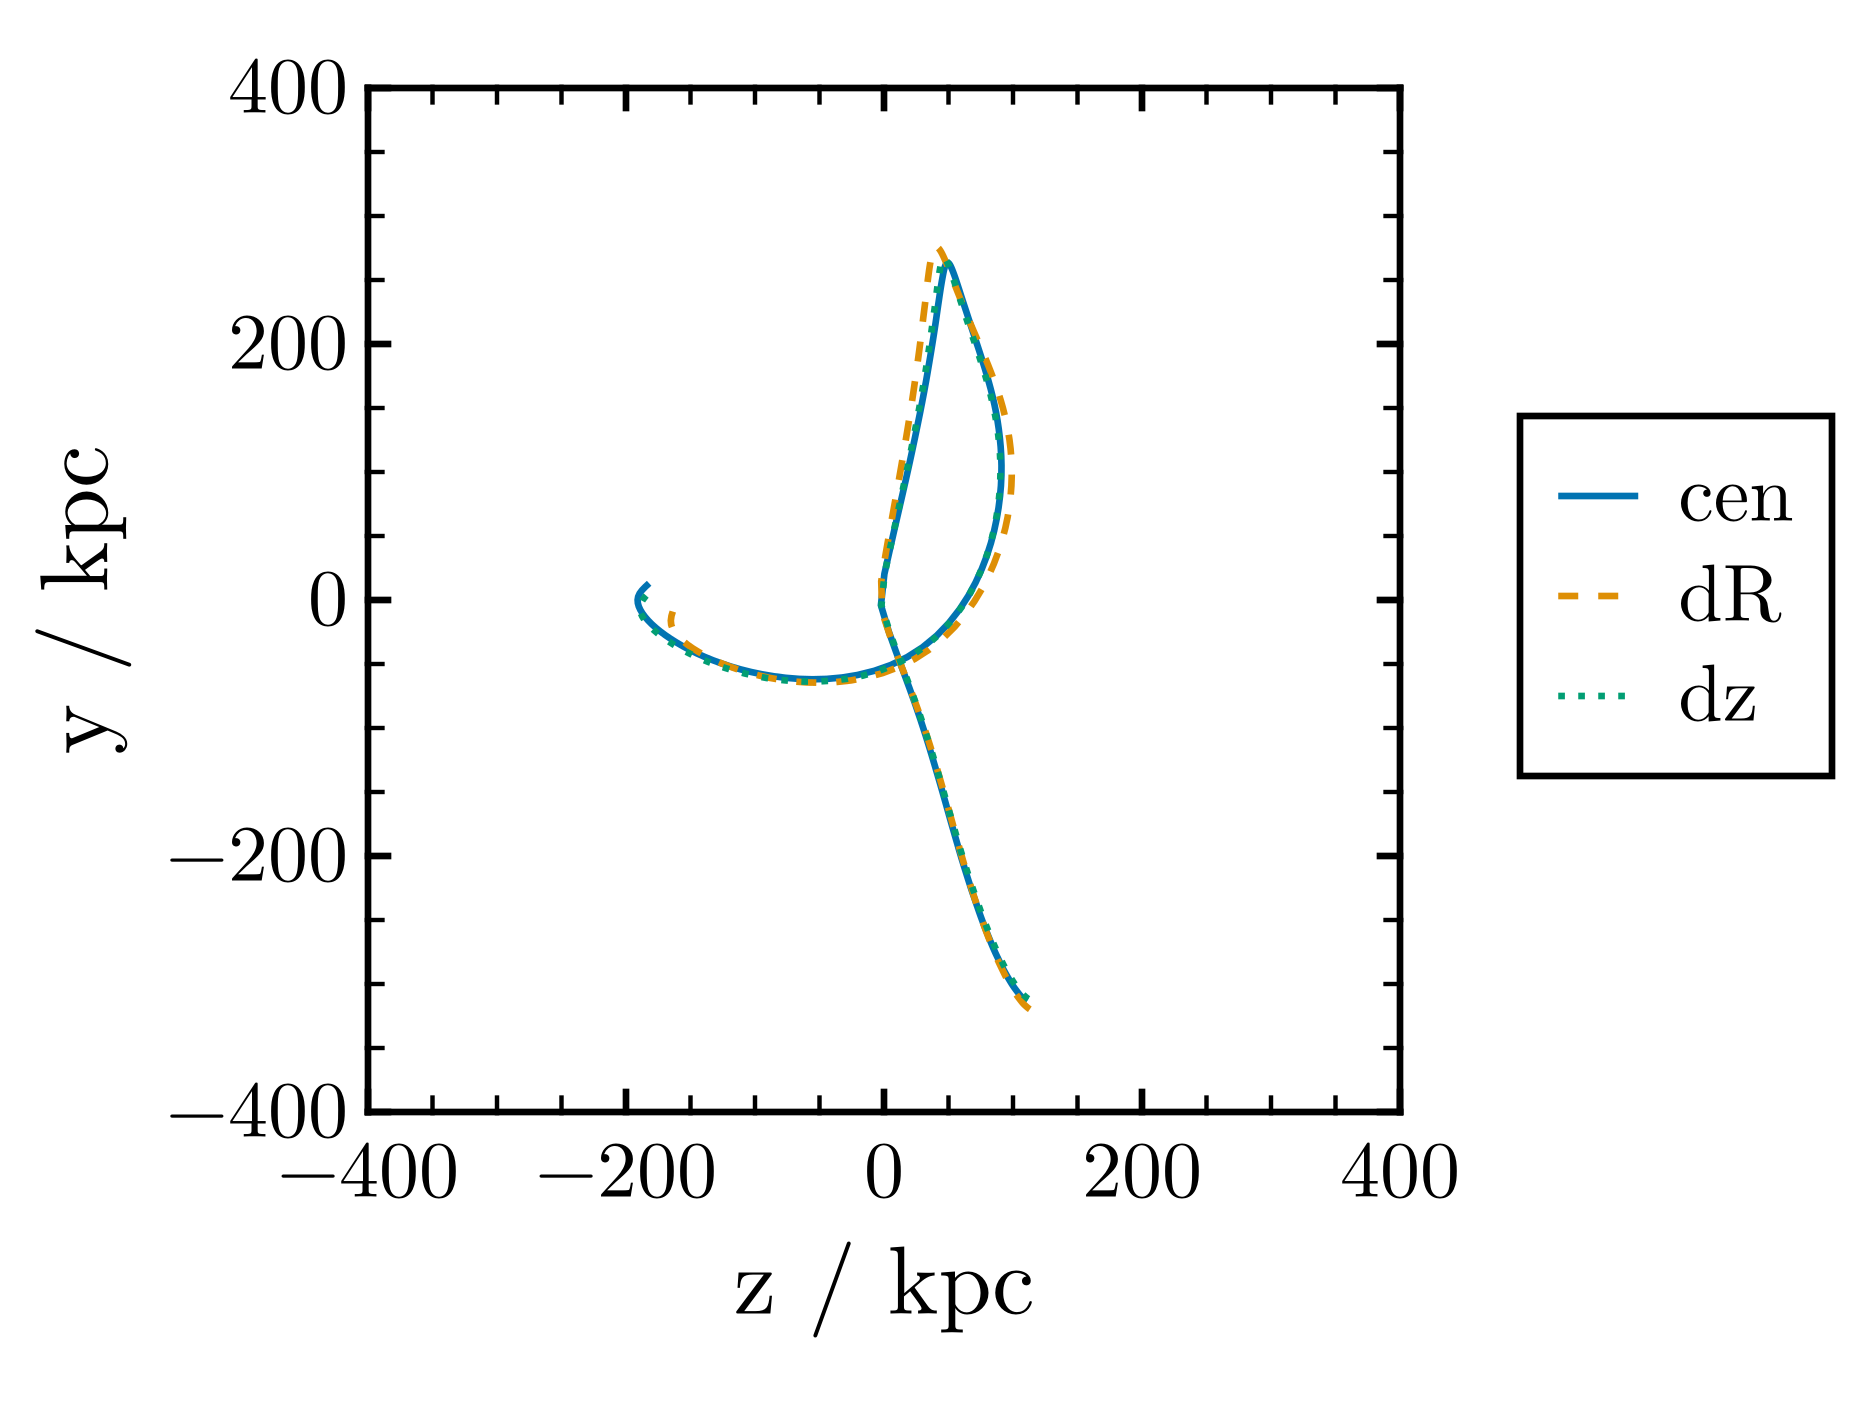

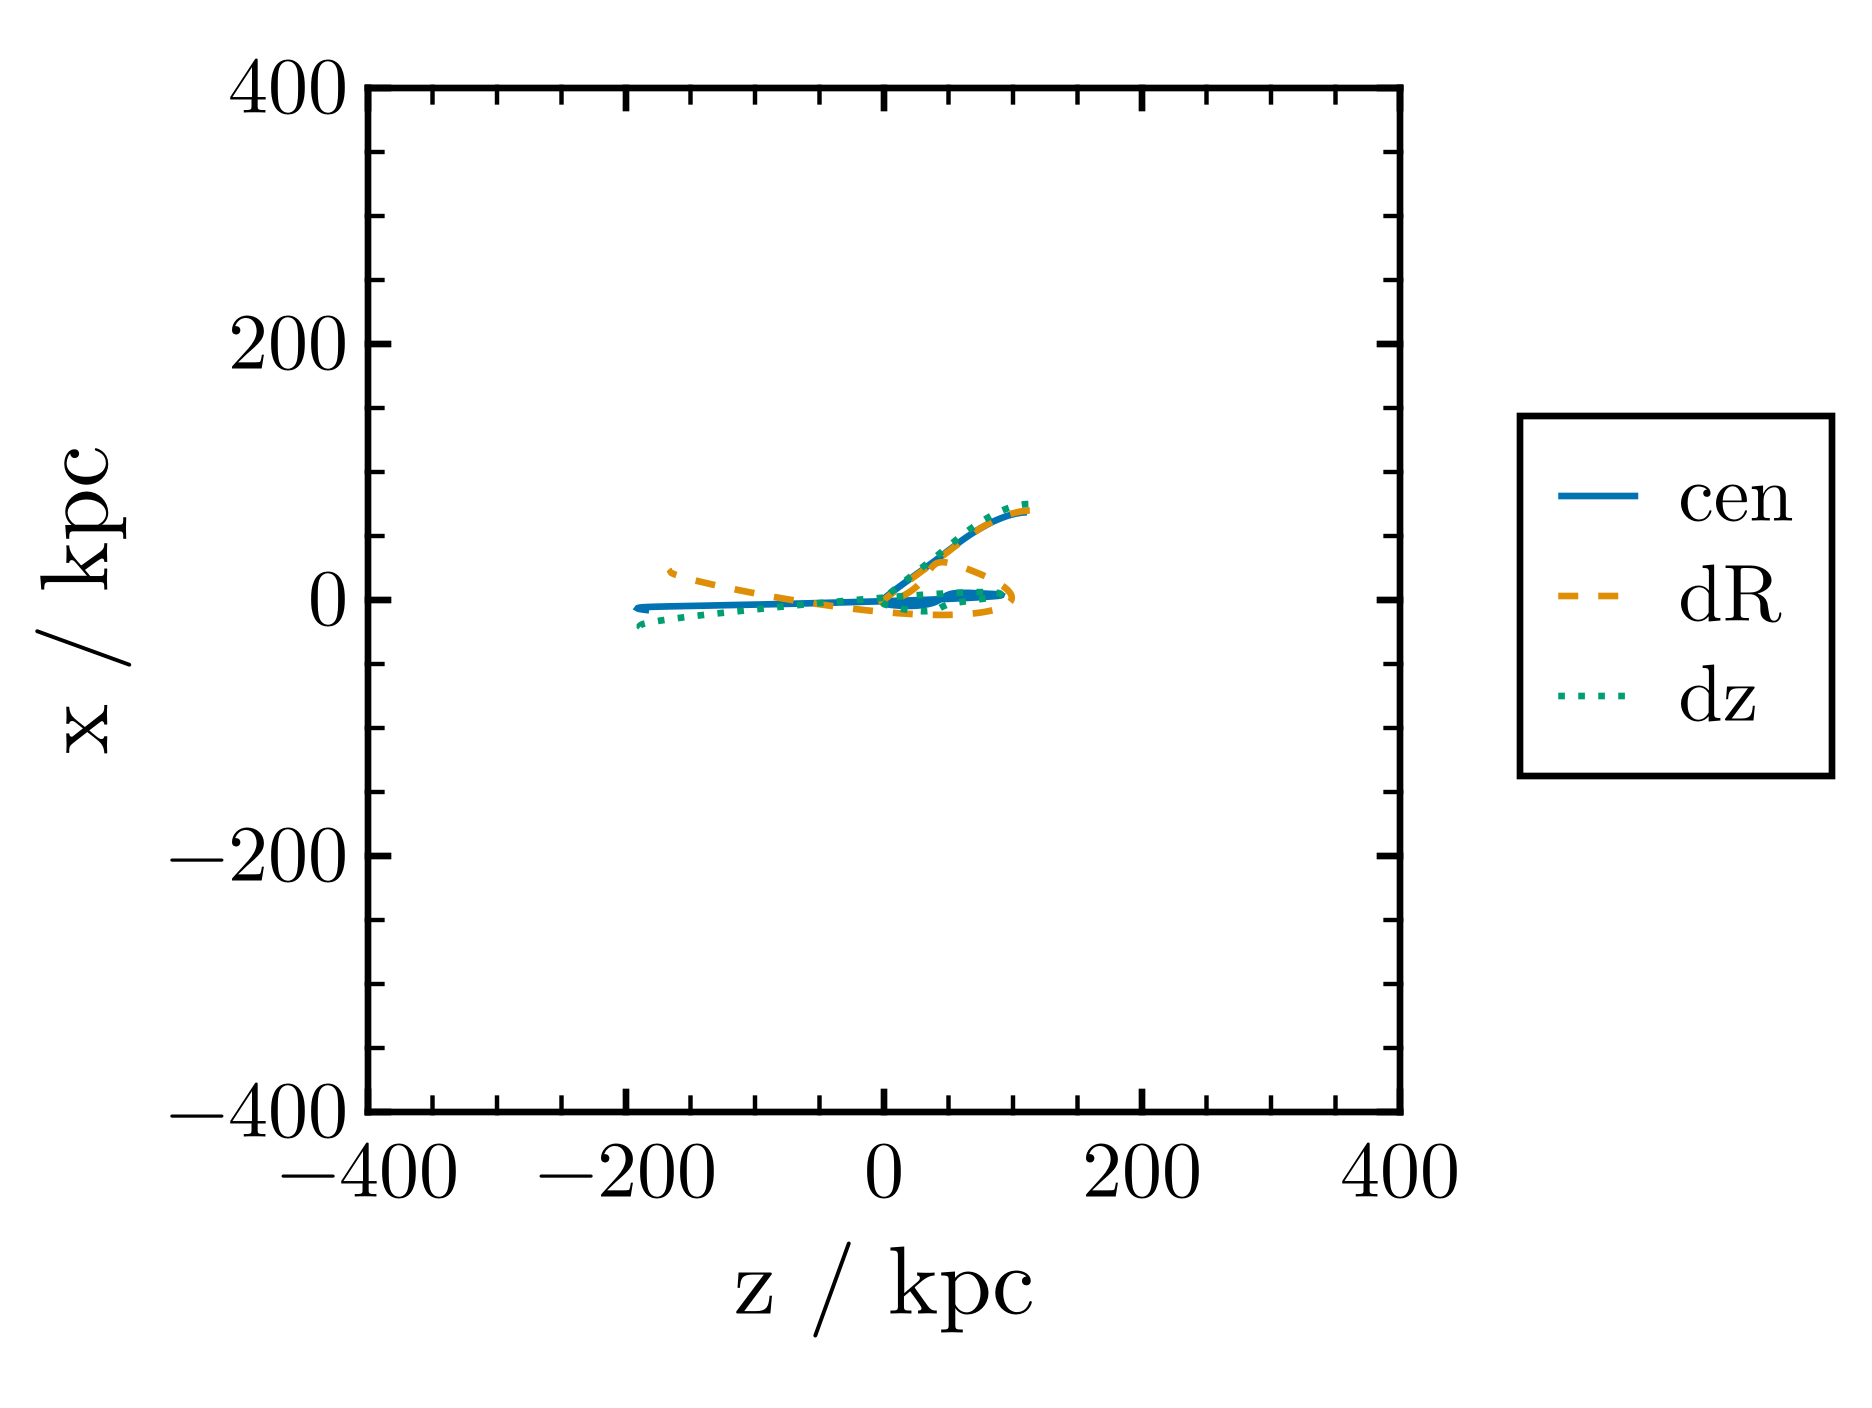

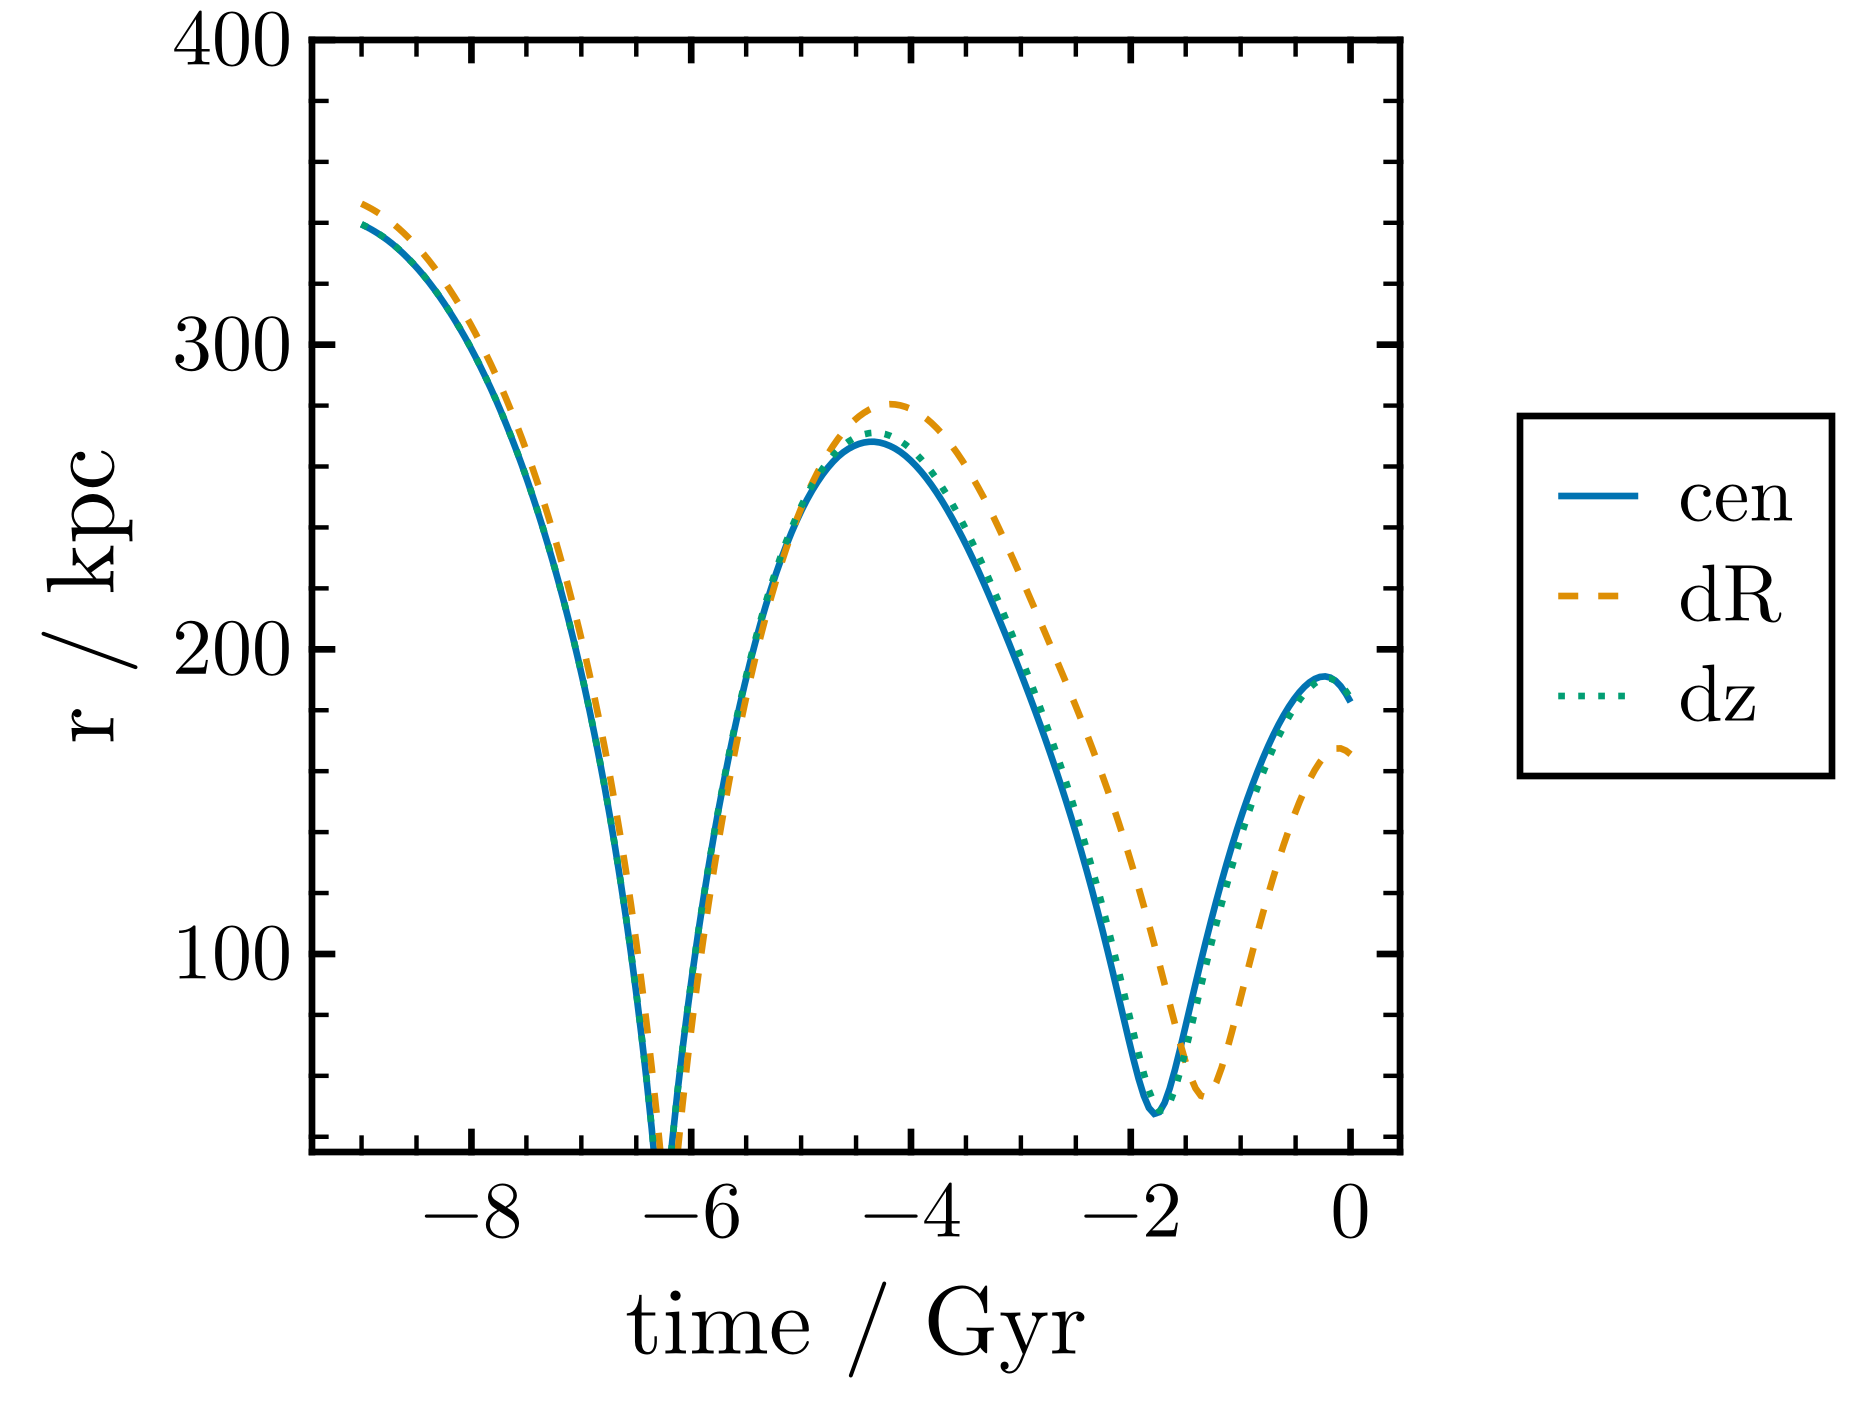

CairoMakie.Screen{IMAGE}


In [54]:
compare_orbits(orbits, limits=400)

# Old comparisons

In [11]:
orbits = [
    "mean" => load_orbit_expected("sculptor/1e7_V31_r3.2/orbit_mean/orbit.csv"),
    "smallperi" => load_orbit_expected("sculptor/1e7_V31_r3.2/orbit_smallperi/orbit.csv"),
    ];

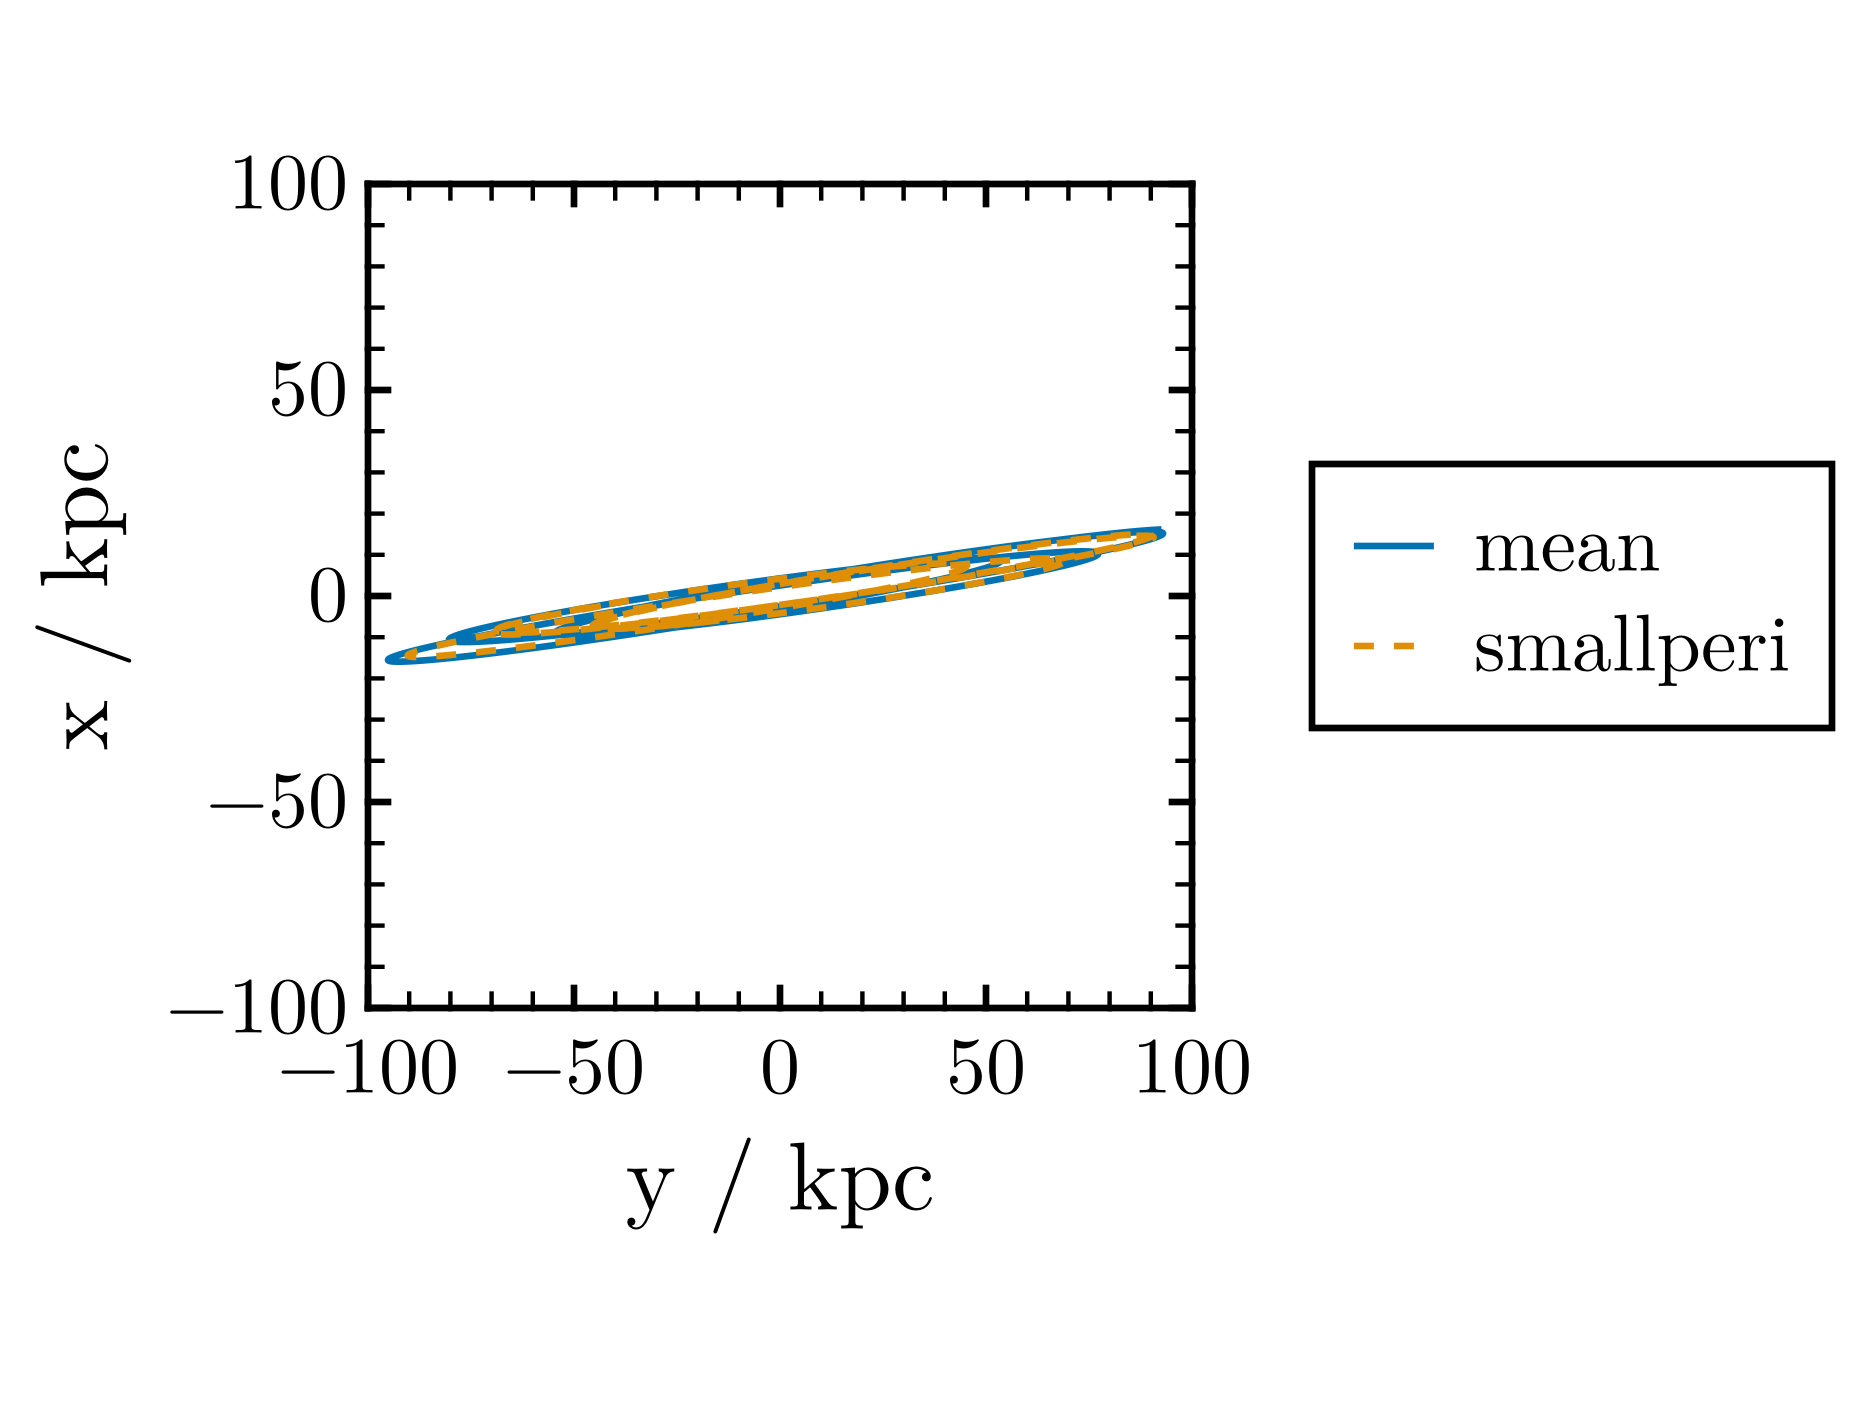

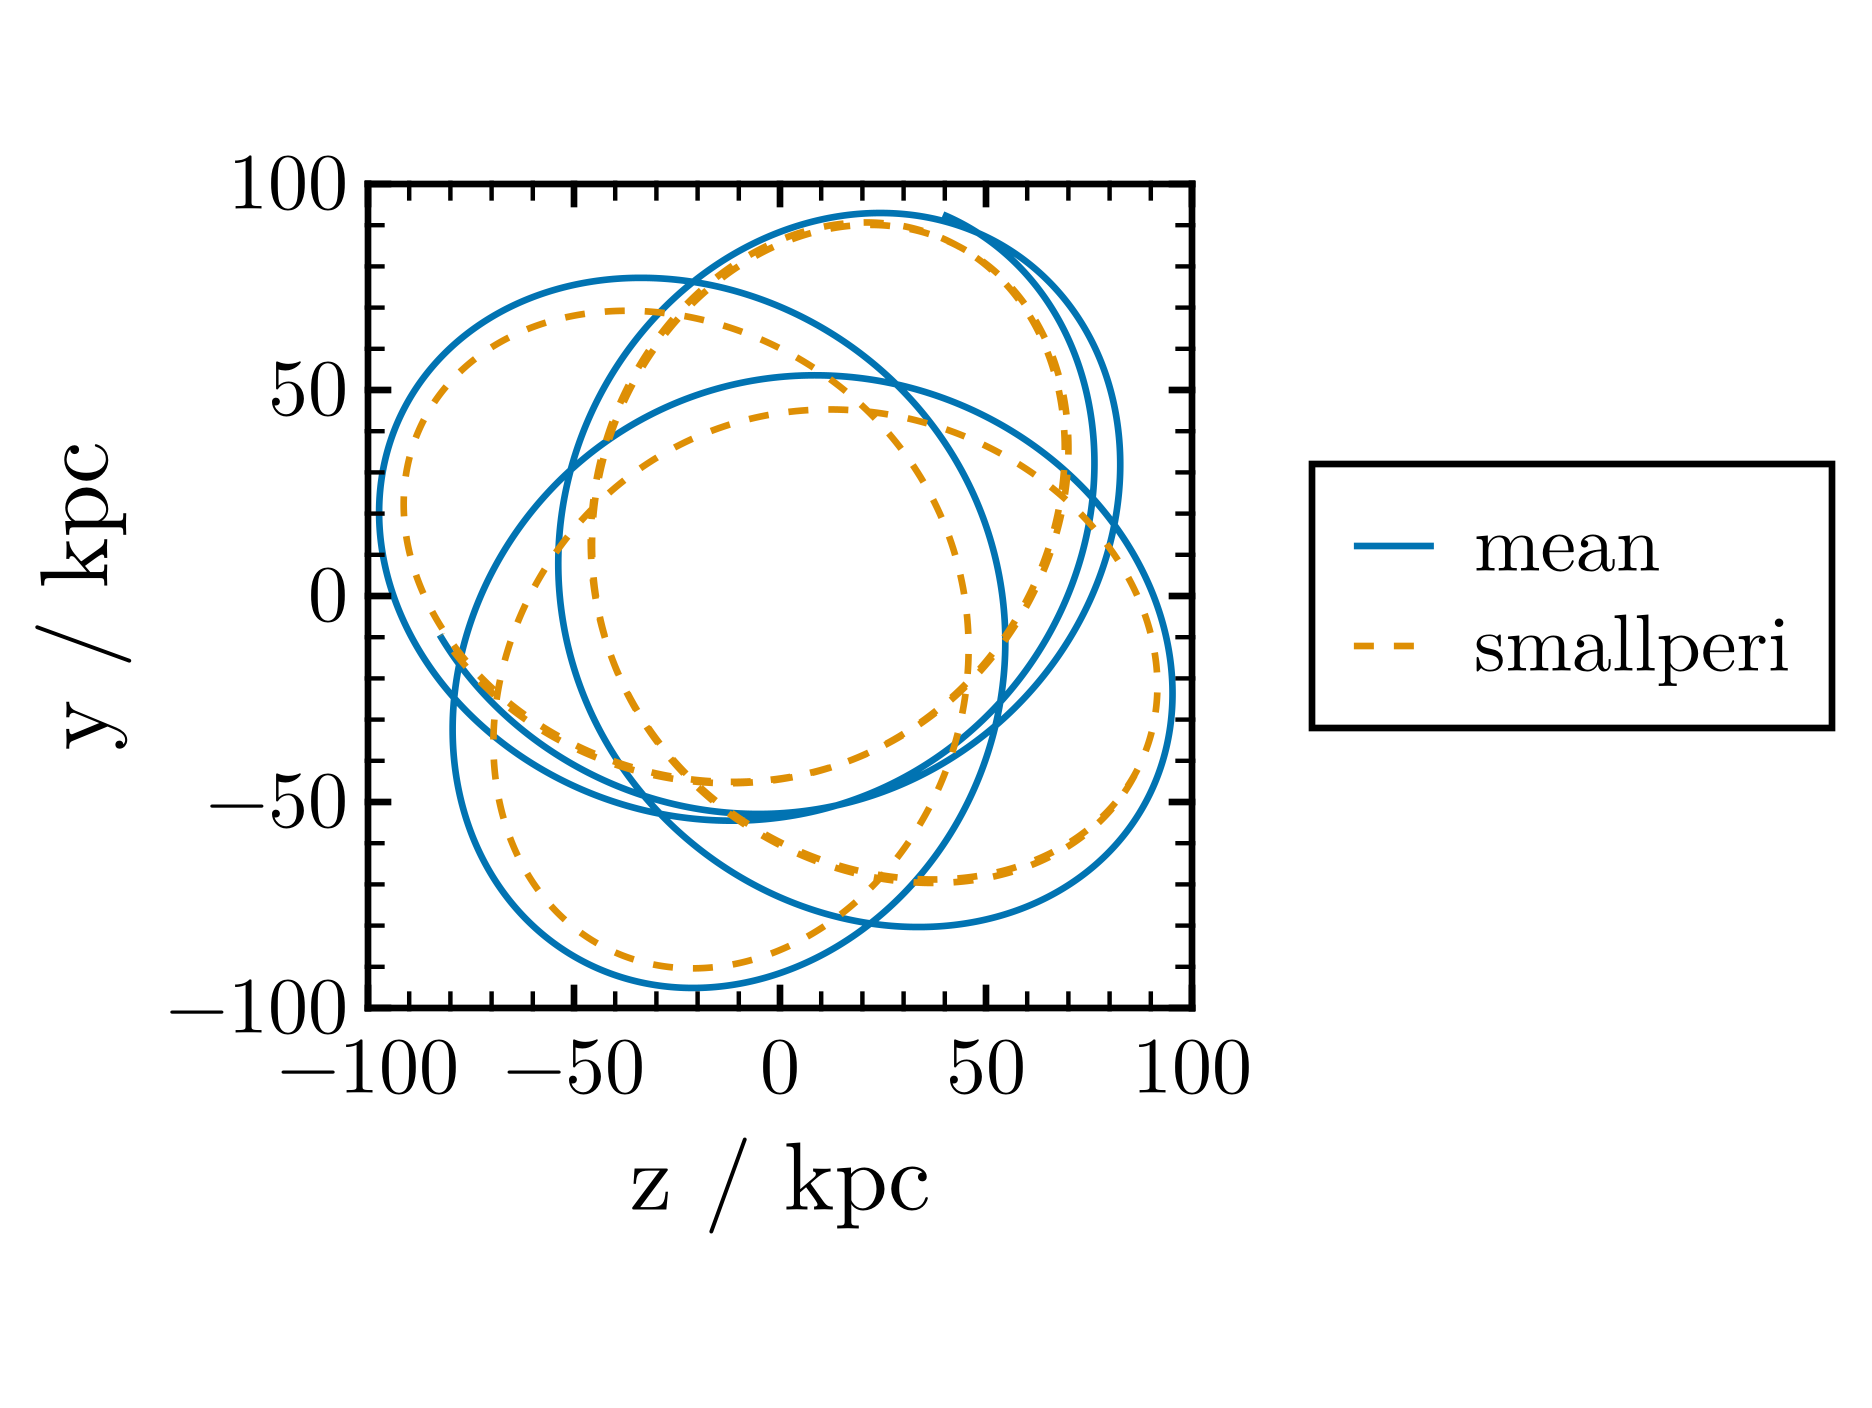

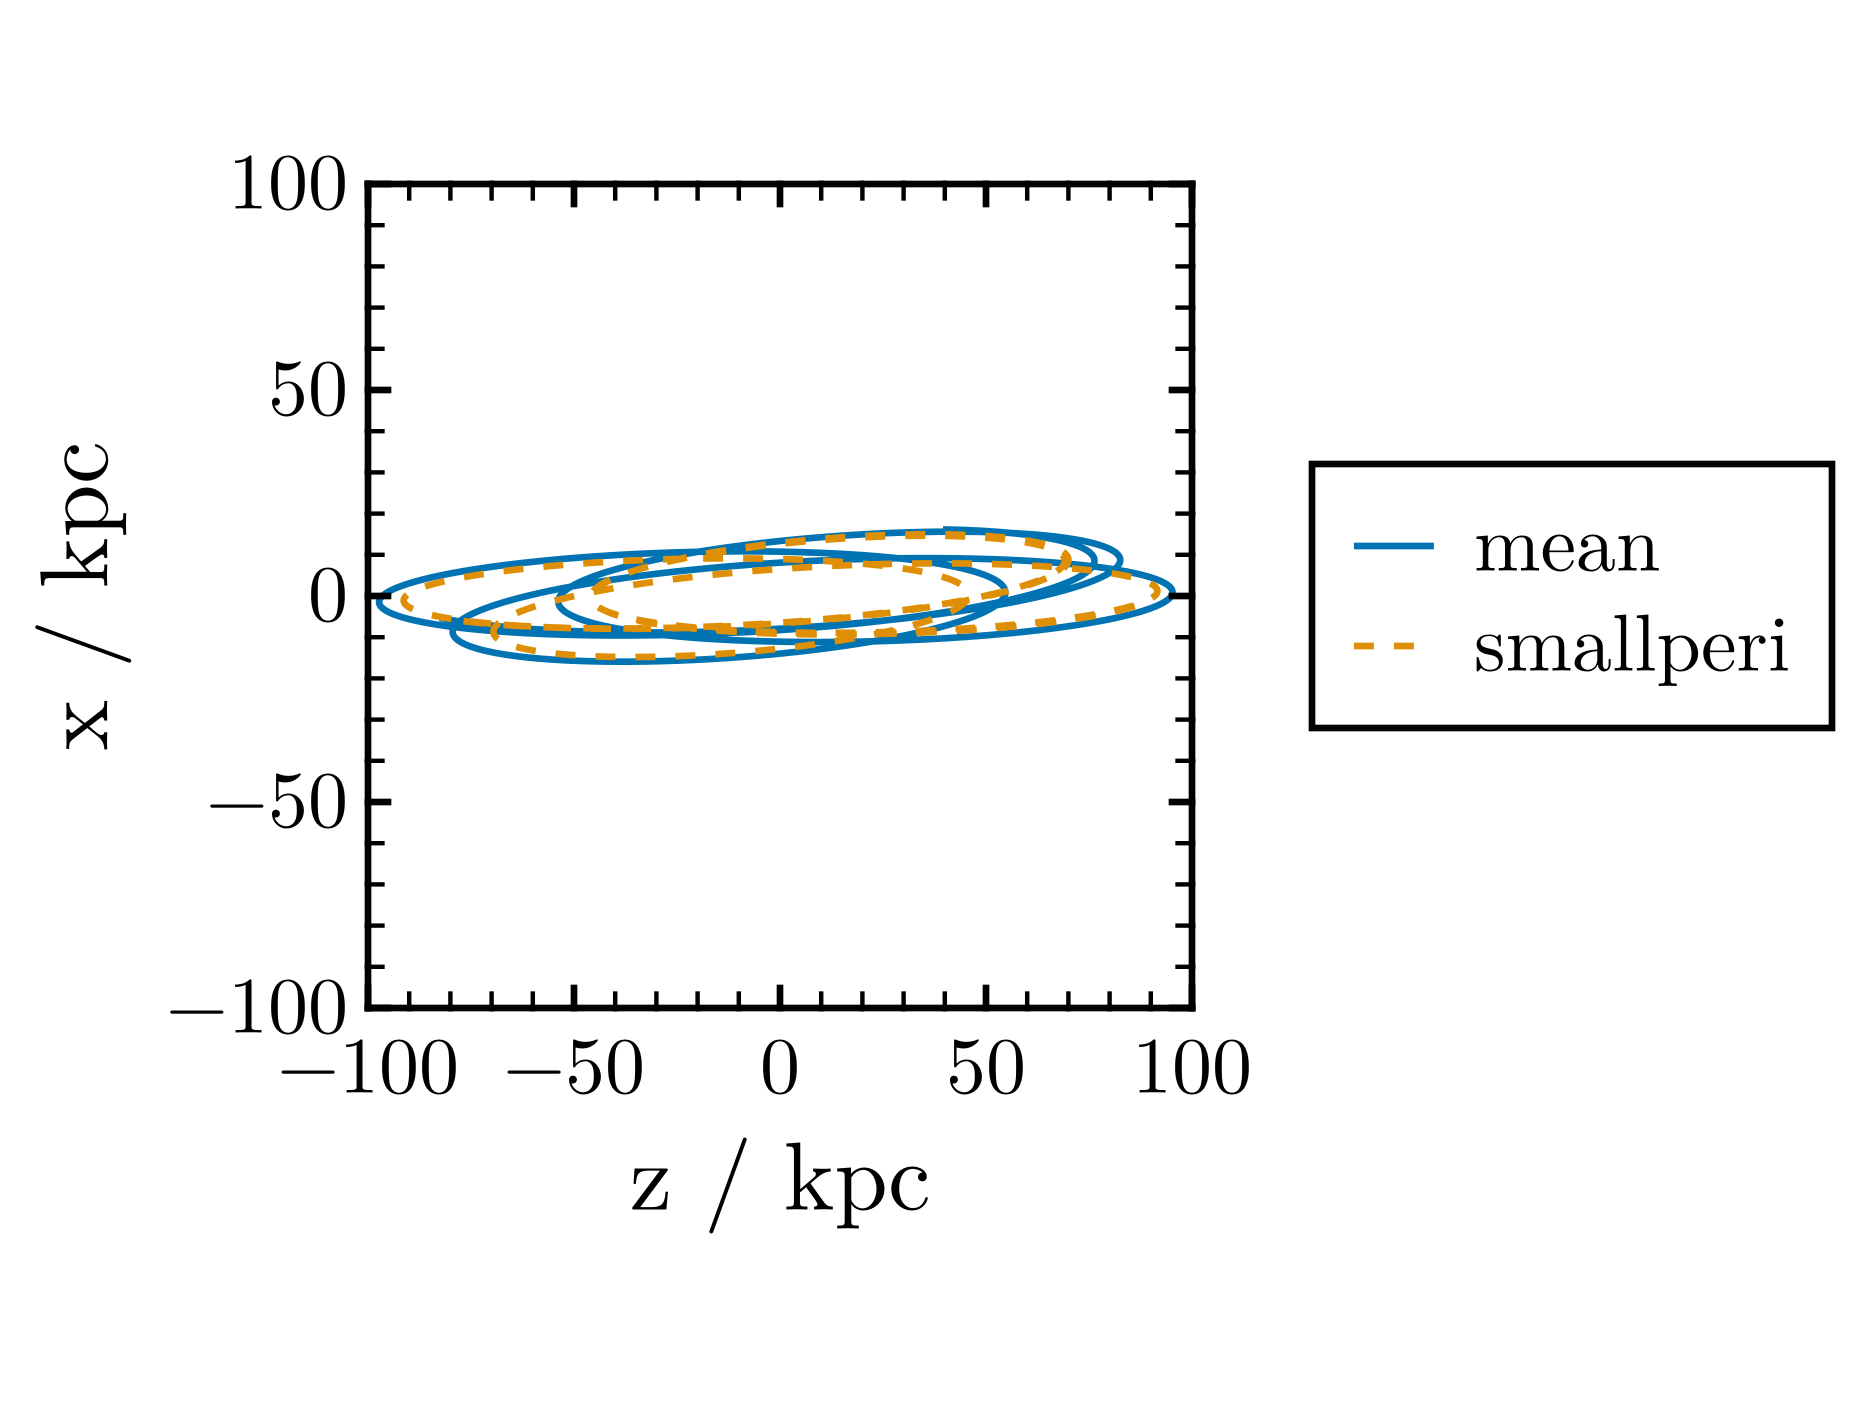

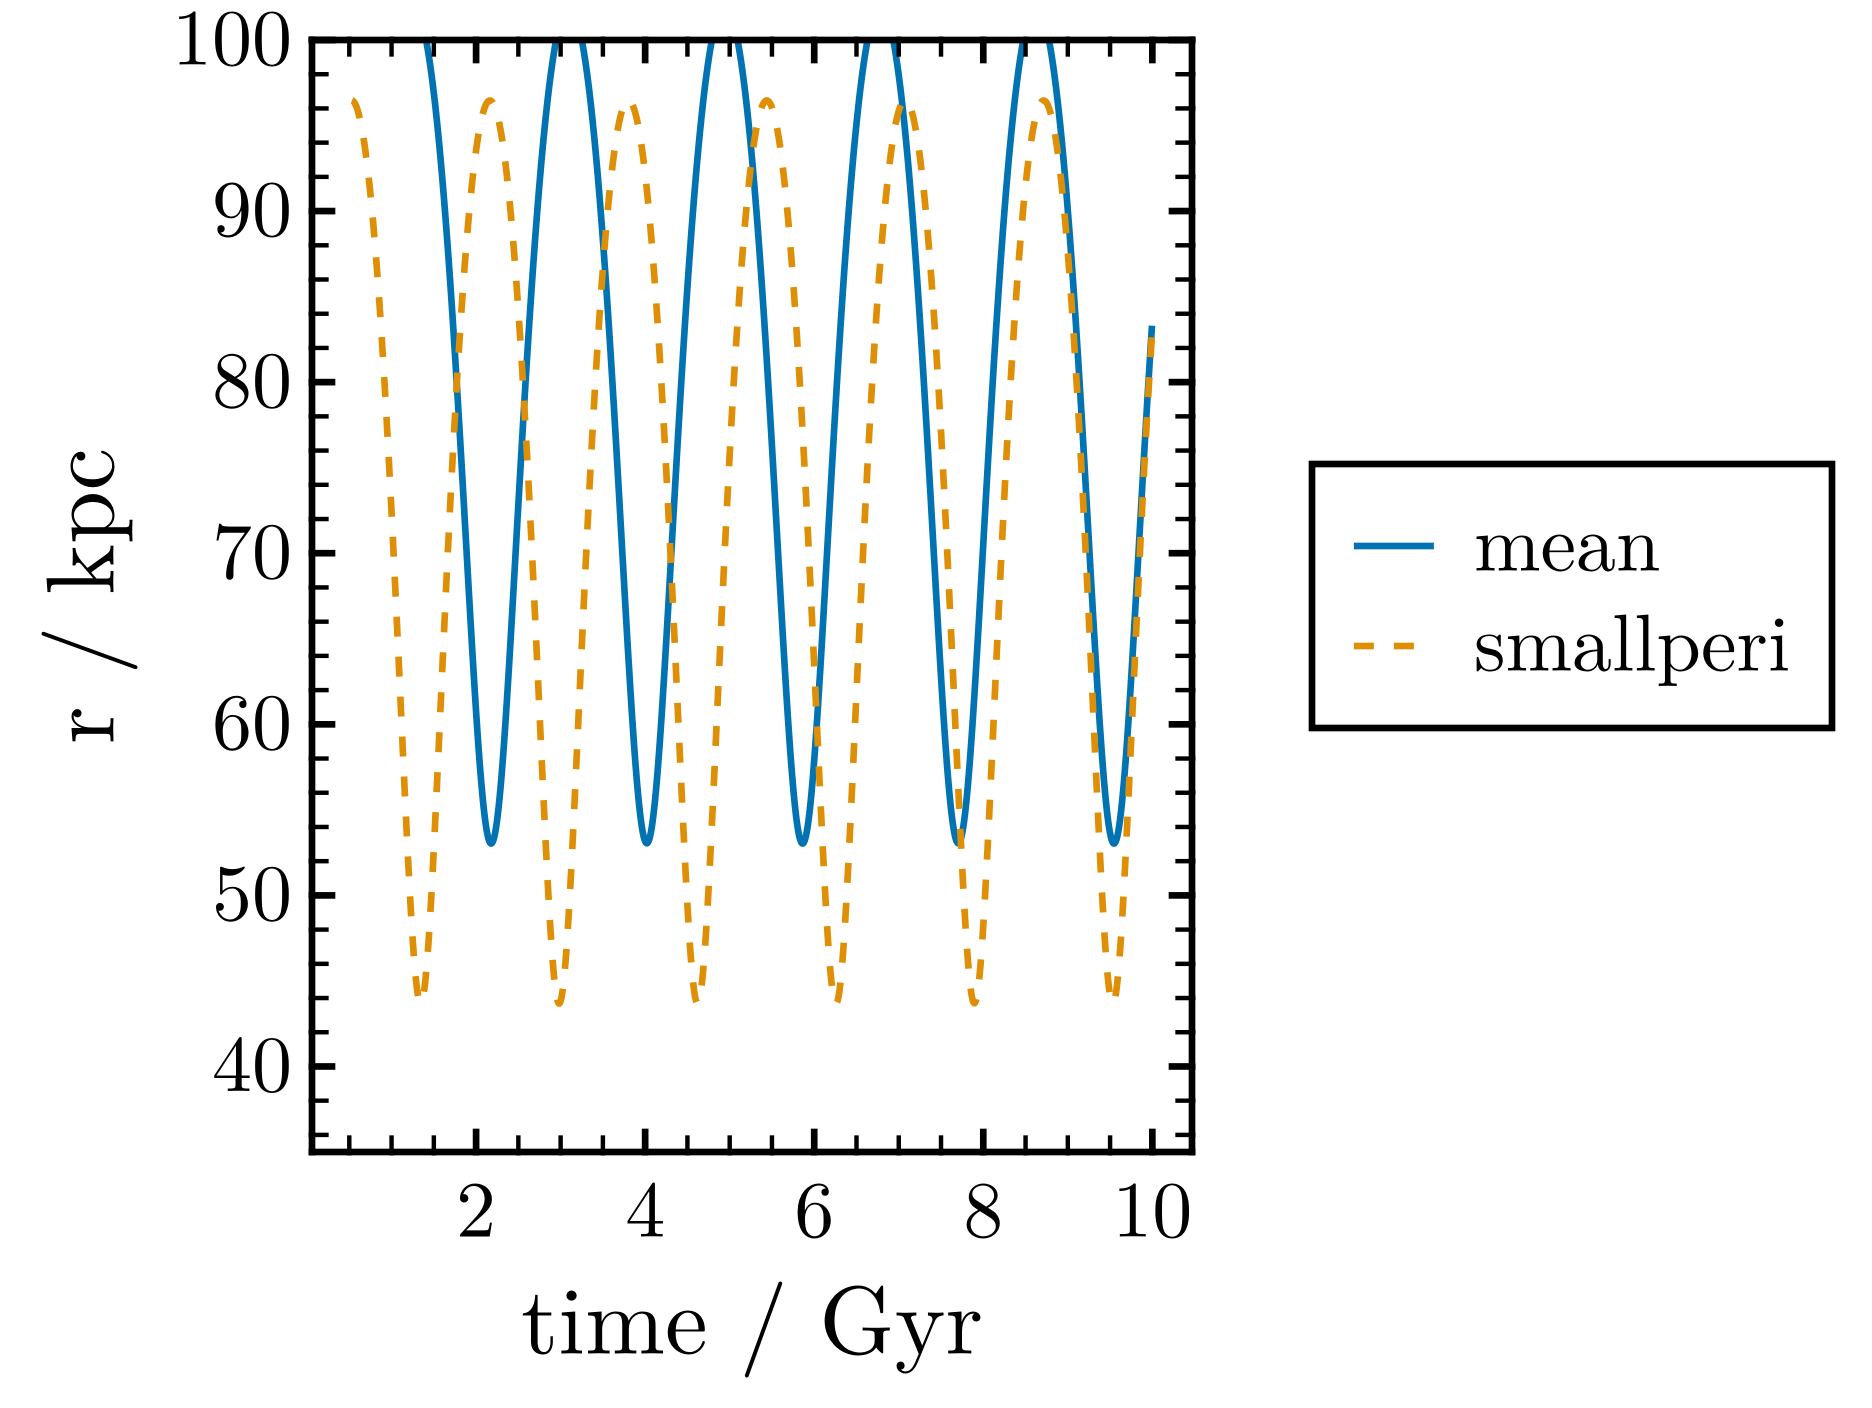

CairoMakie.Screen{IMAGE}


In [12]:
compare_orbits(orbits)

In [20]:
orbits = [
    "mean" => load_orbit_expected("sculptor/1e7_V31_r3.2/orbit_mean/orbit.csv"),
    "mean2" => load_orbit_expected("sculptor/1e6_new_v31_r3.2/orbit_mean/orbit.csv"),
    ];

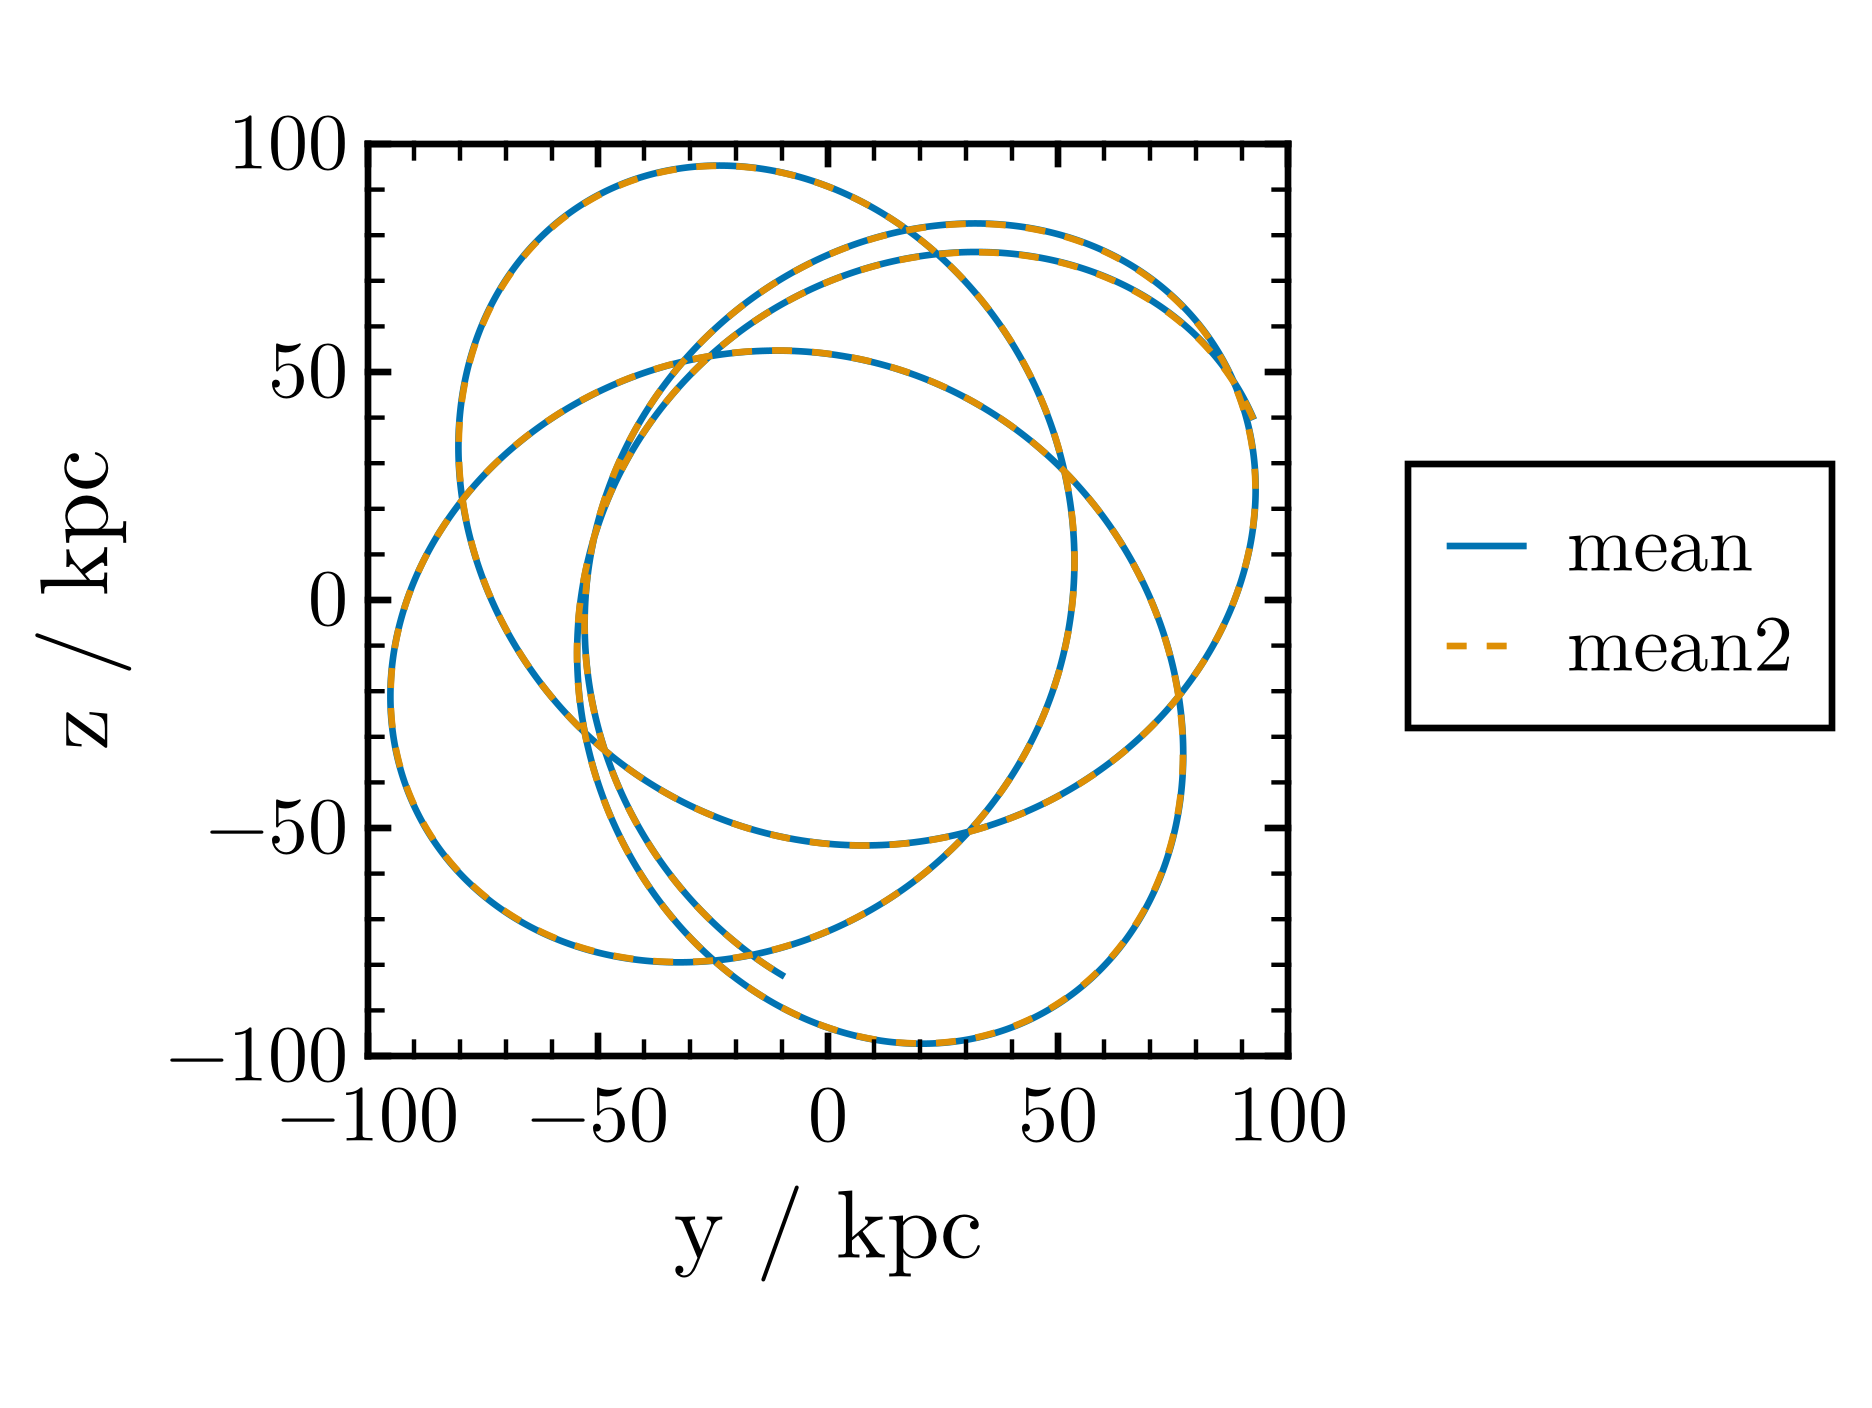

In [21]:
compare_orbits_2d(orbits, yname="z", xname="y", limits=(-100,100,-100,100))

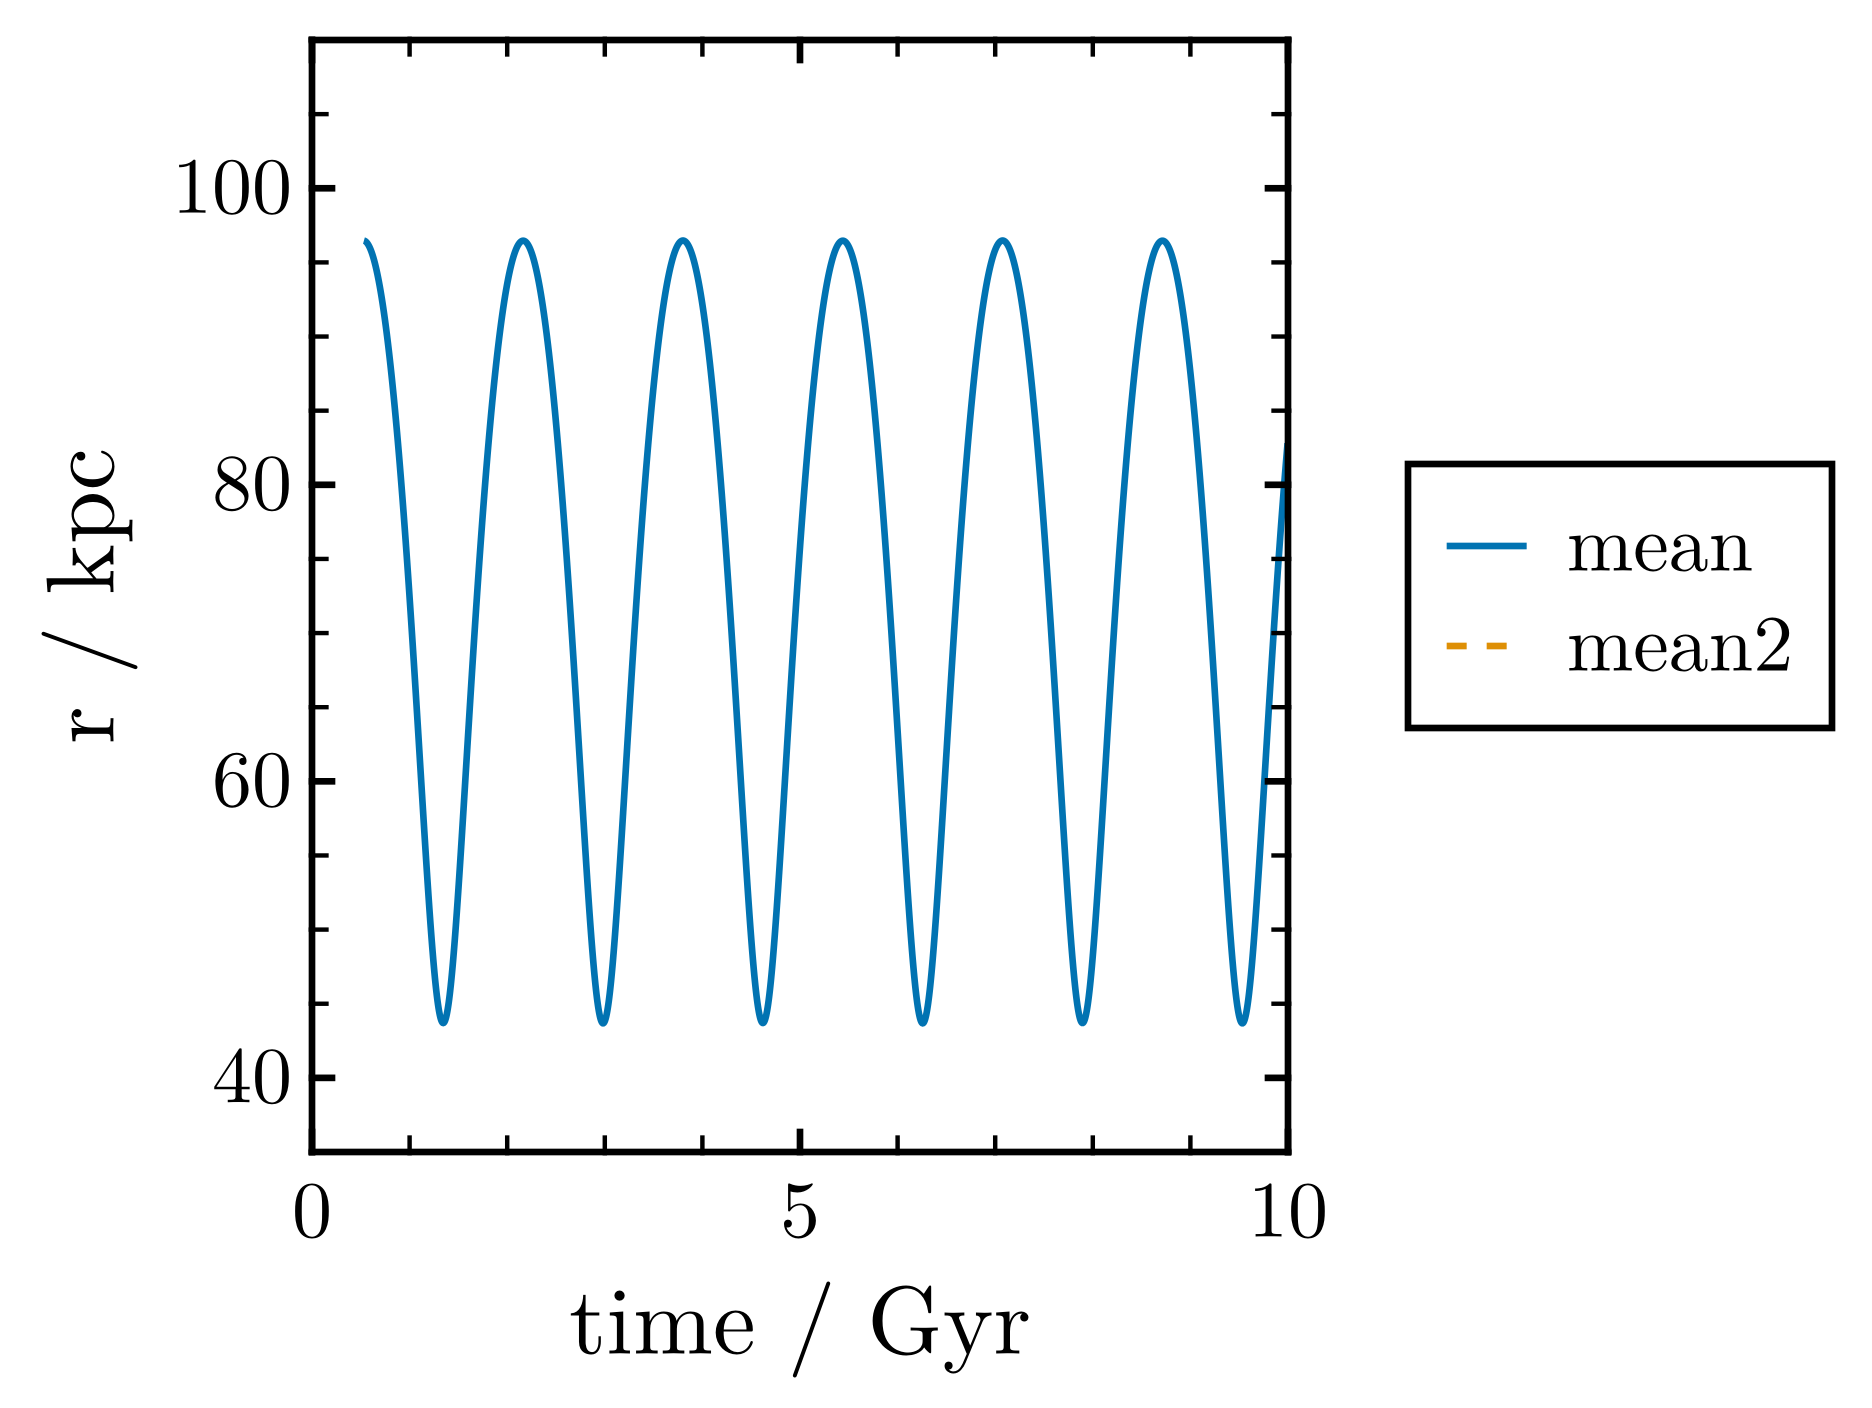

In [25]:
compare_orbits_2d(orbits, yname="r", xname="time", aspect=nothing, xunits="Gyr", limits=(0, 10, 35, 110))

In [22]:
orbits = [
    "mean" => load_orbit_expected("sculptor/1e7_V31_r3.2/orbit_smallperi/orbit.csv"),
    "mean2" => load_orbit_expected("sculptor/1e6_new_v31_r3.2/orbit_smallperi/orbit.csv"),
    ];

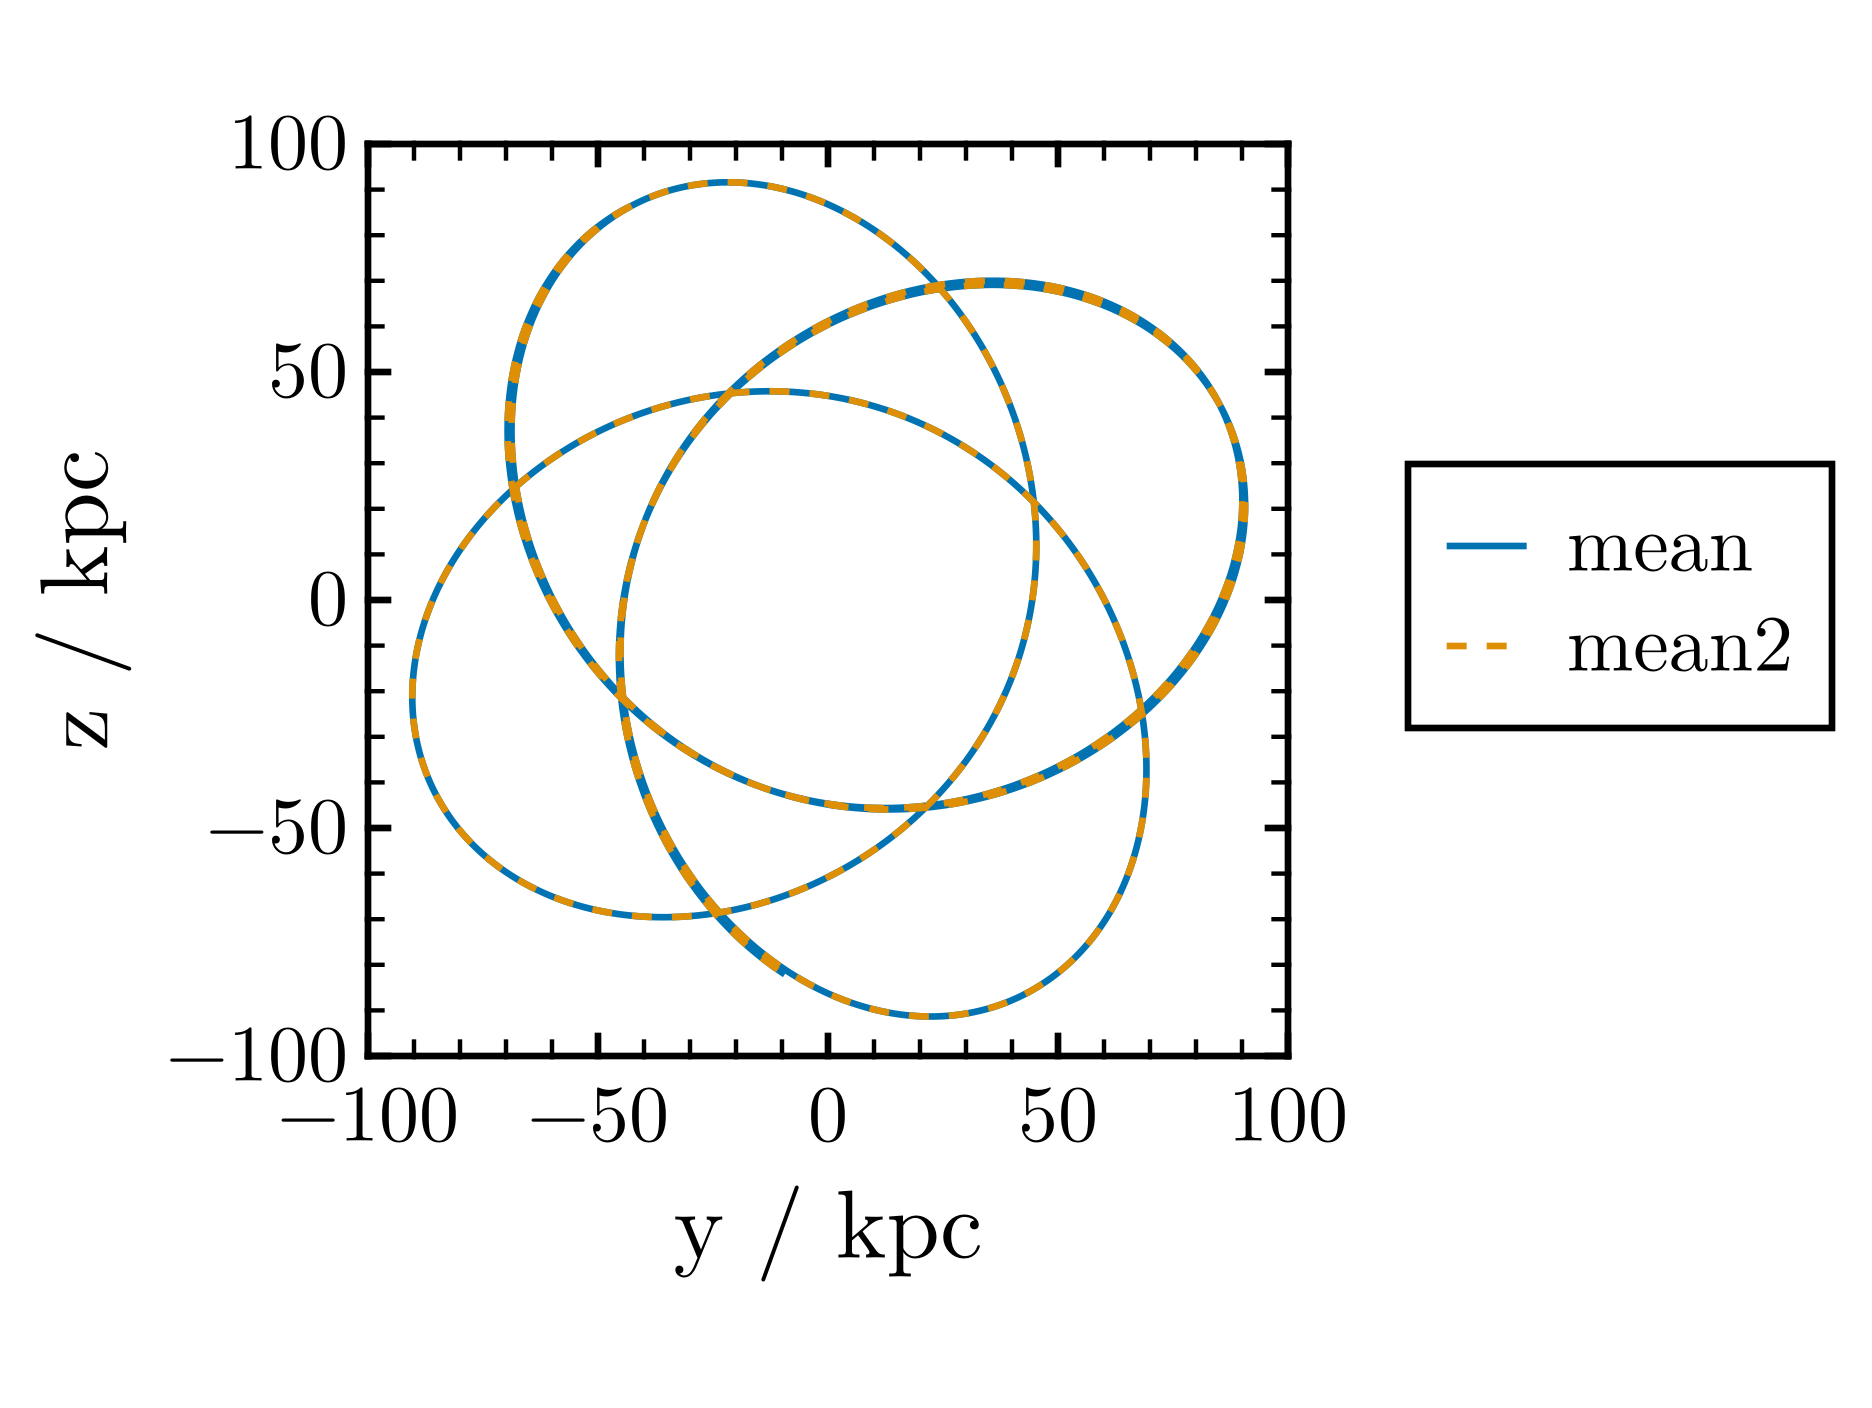

In [23]:
compare_orbits_2d(orbits, yname="z", xname="y", limits=(-100,100,-100,100))

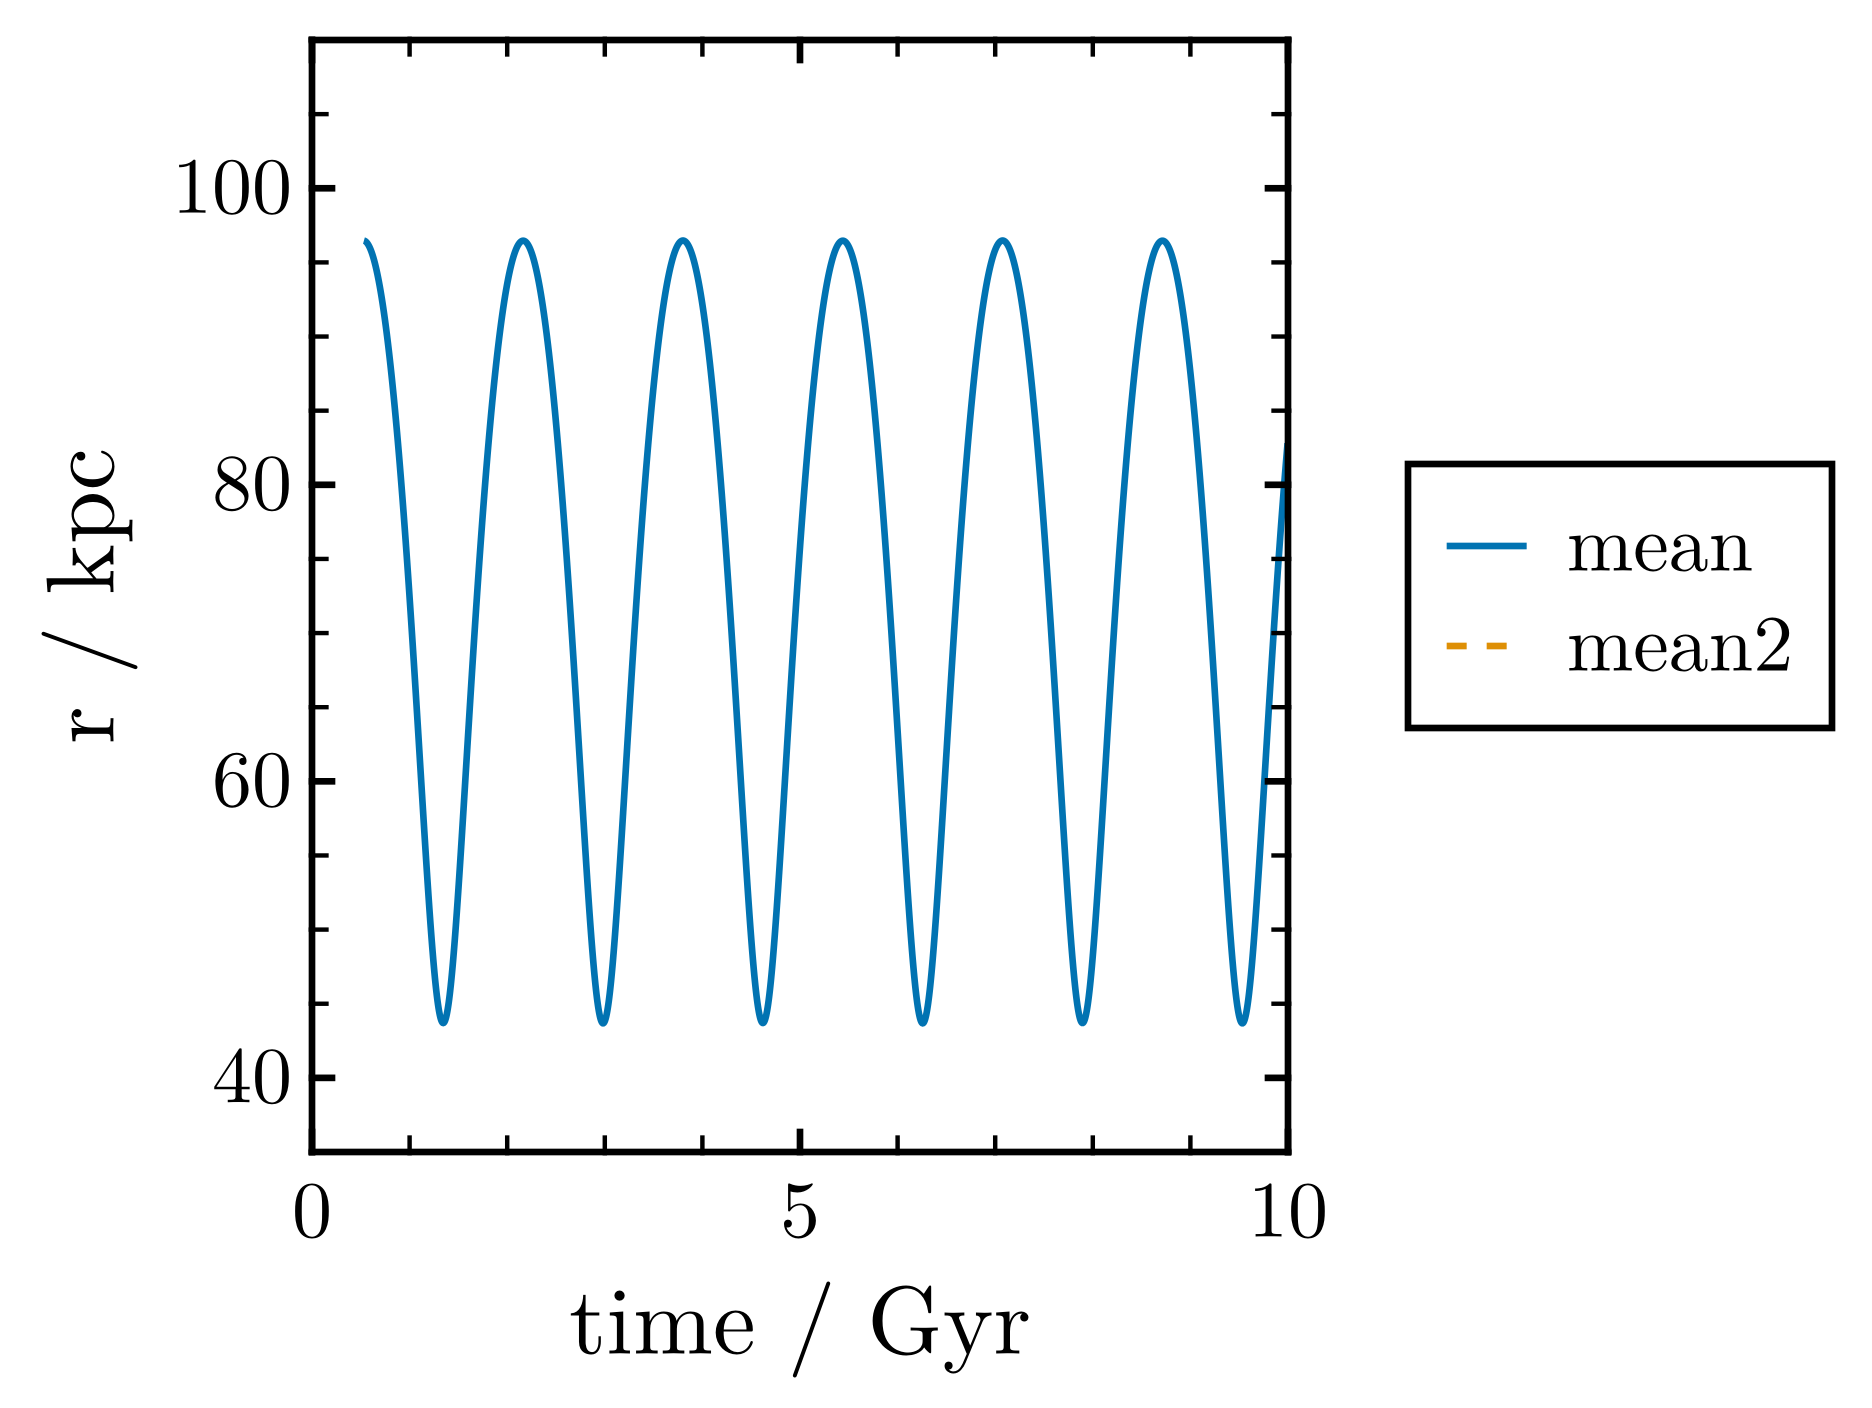

In [24]:
compare_orbits_2d(orbits, yname="r", xname="time", aspect=nothing, xunits="Gyr", limits=(0, 10, 35, 110))

In [10]:
orbits = [
    "iorio fiducial" => load_orbit_expected(ENV["DWARFS_ROOT"] * "/analysis/sculptor/mc_orbits/iorio/orbit1.csv"),
    "iorio extreme" => load_orbit_expected(ENV["DWARFS_ROOT"] * "/analysis/sculptor/mc_orbits/iorio/orbit2.csv"),
    ];

LoadError: ArgumentError: "/cosma/home/durham/dc-boye1/data/dwarfs/analysis/sculptor/mc_orbits/iorio/orbit1.csv" is not a valid file or doesn't exist

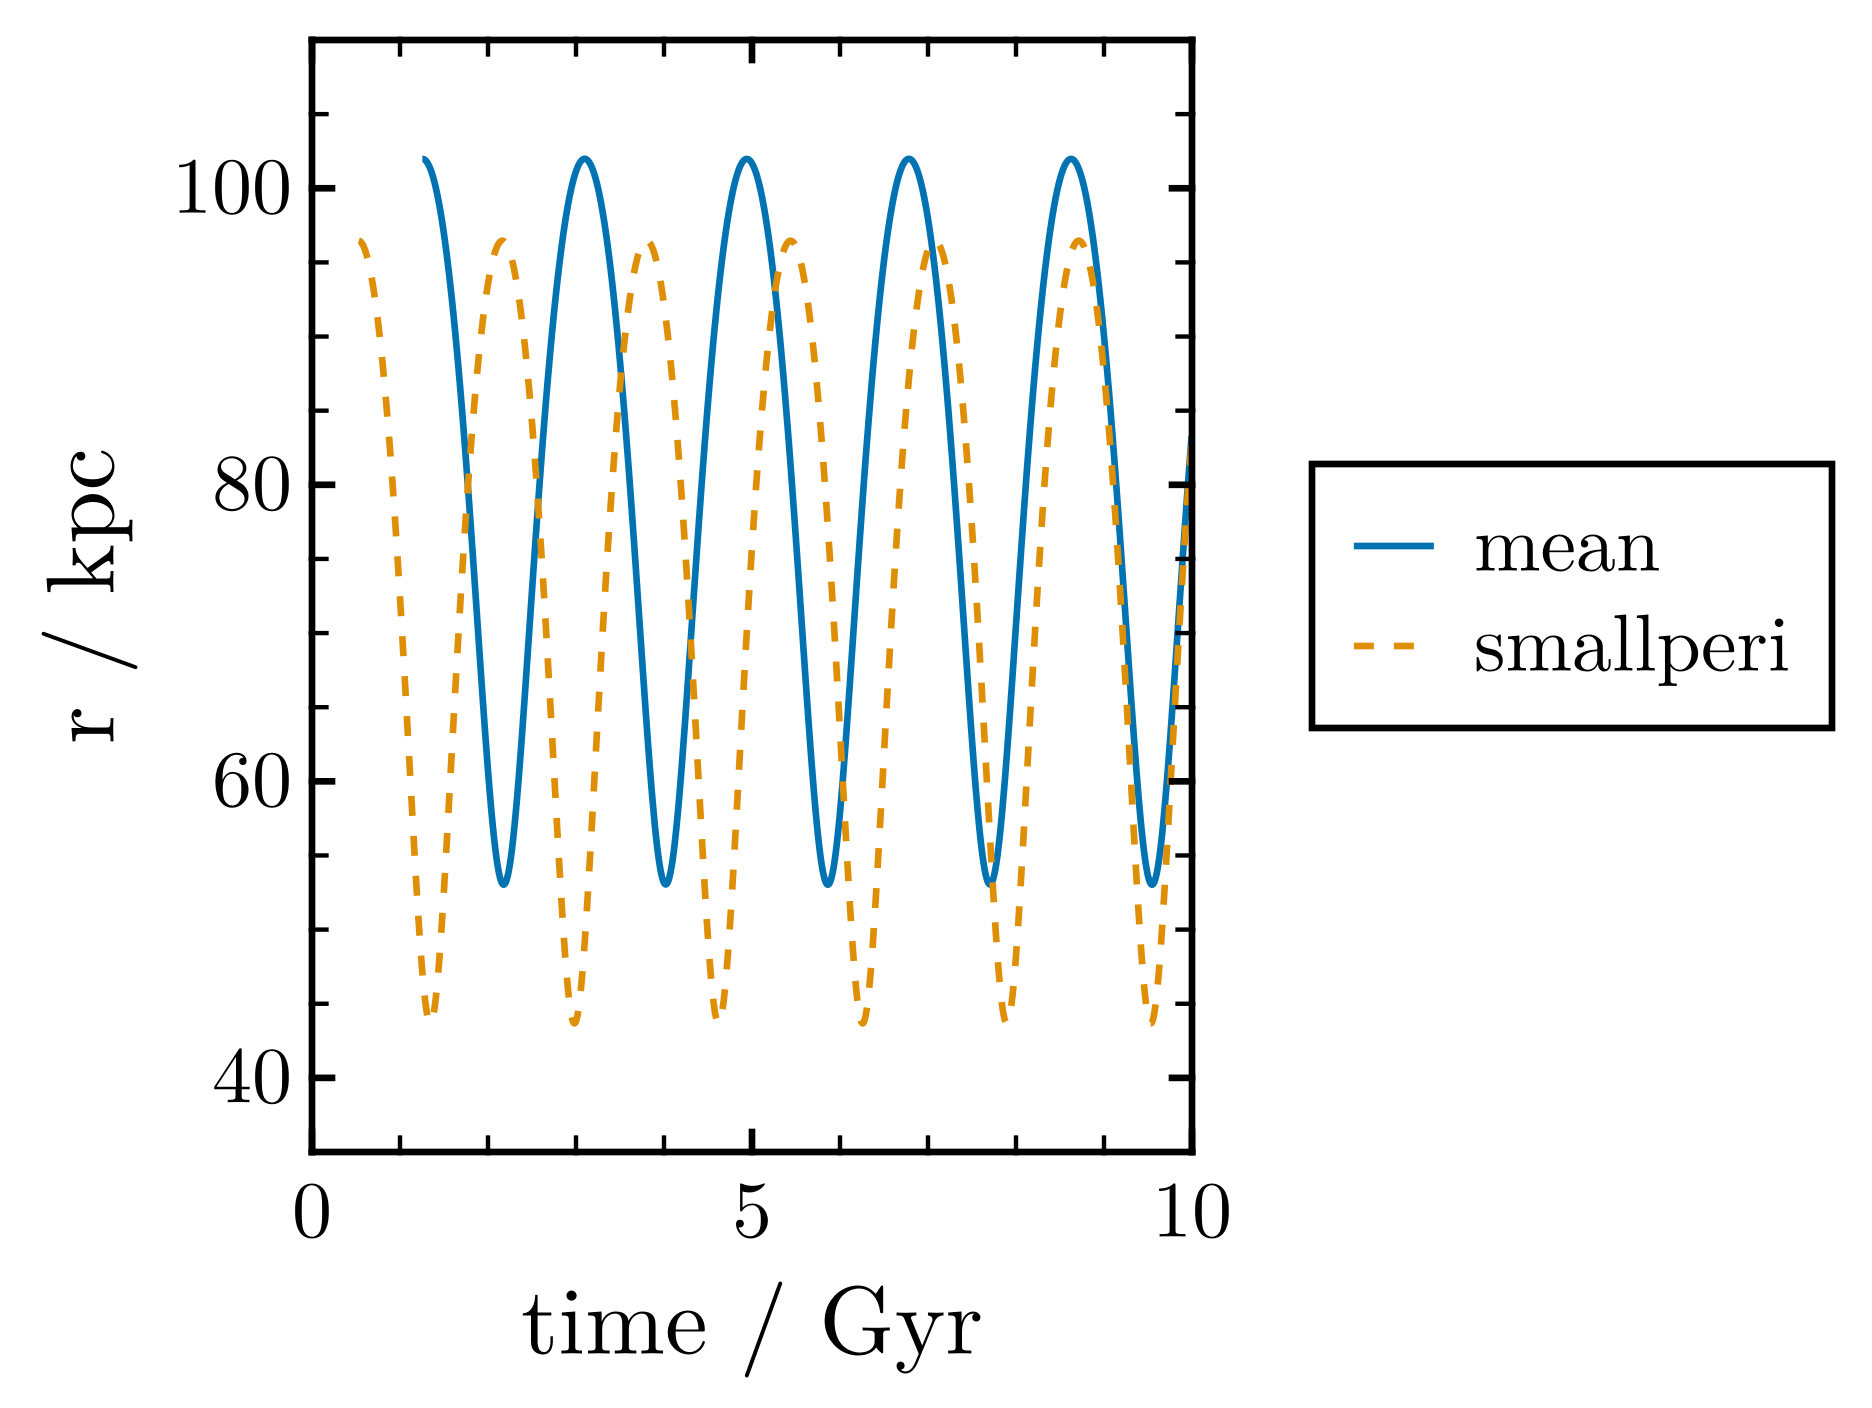

In [11]:
compare_orbits_2d(orbits, yname="r", xname="time", aspect=nothing, xunits="Gyr", limits=(0, 10, 35, 110))

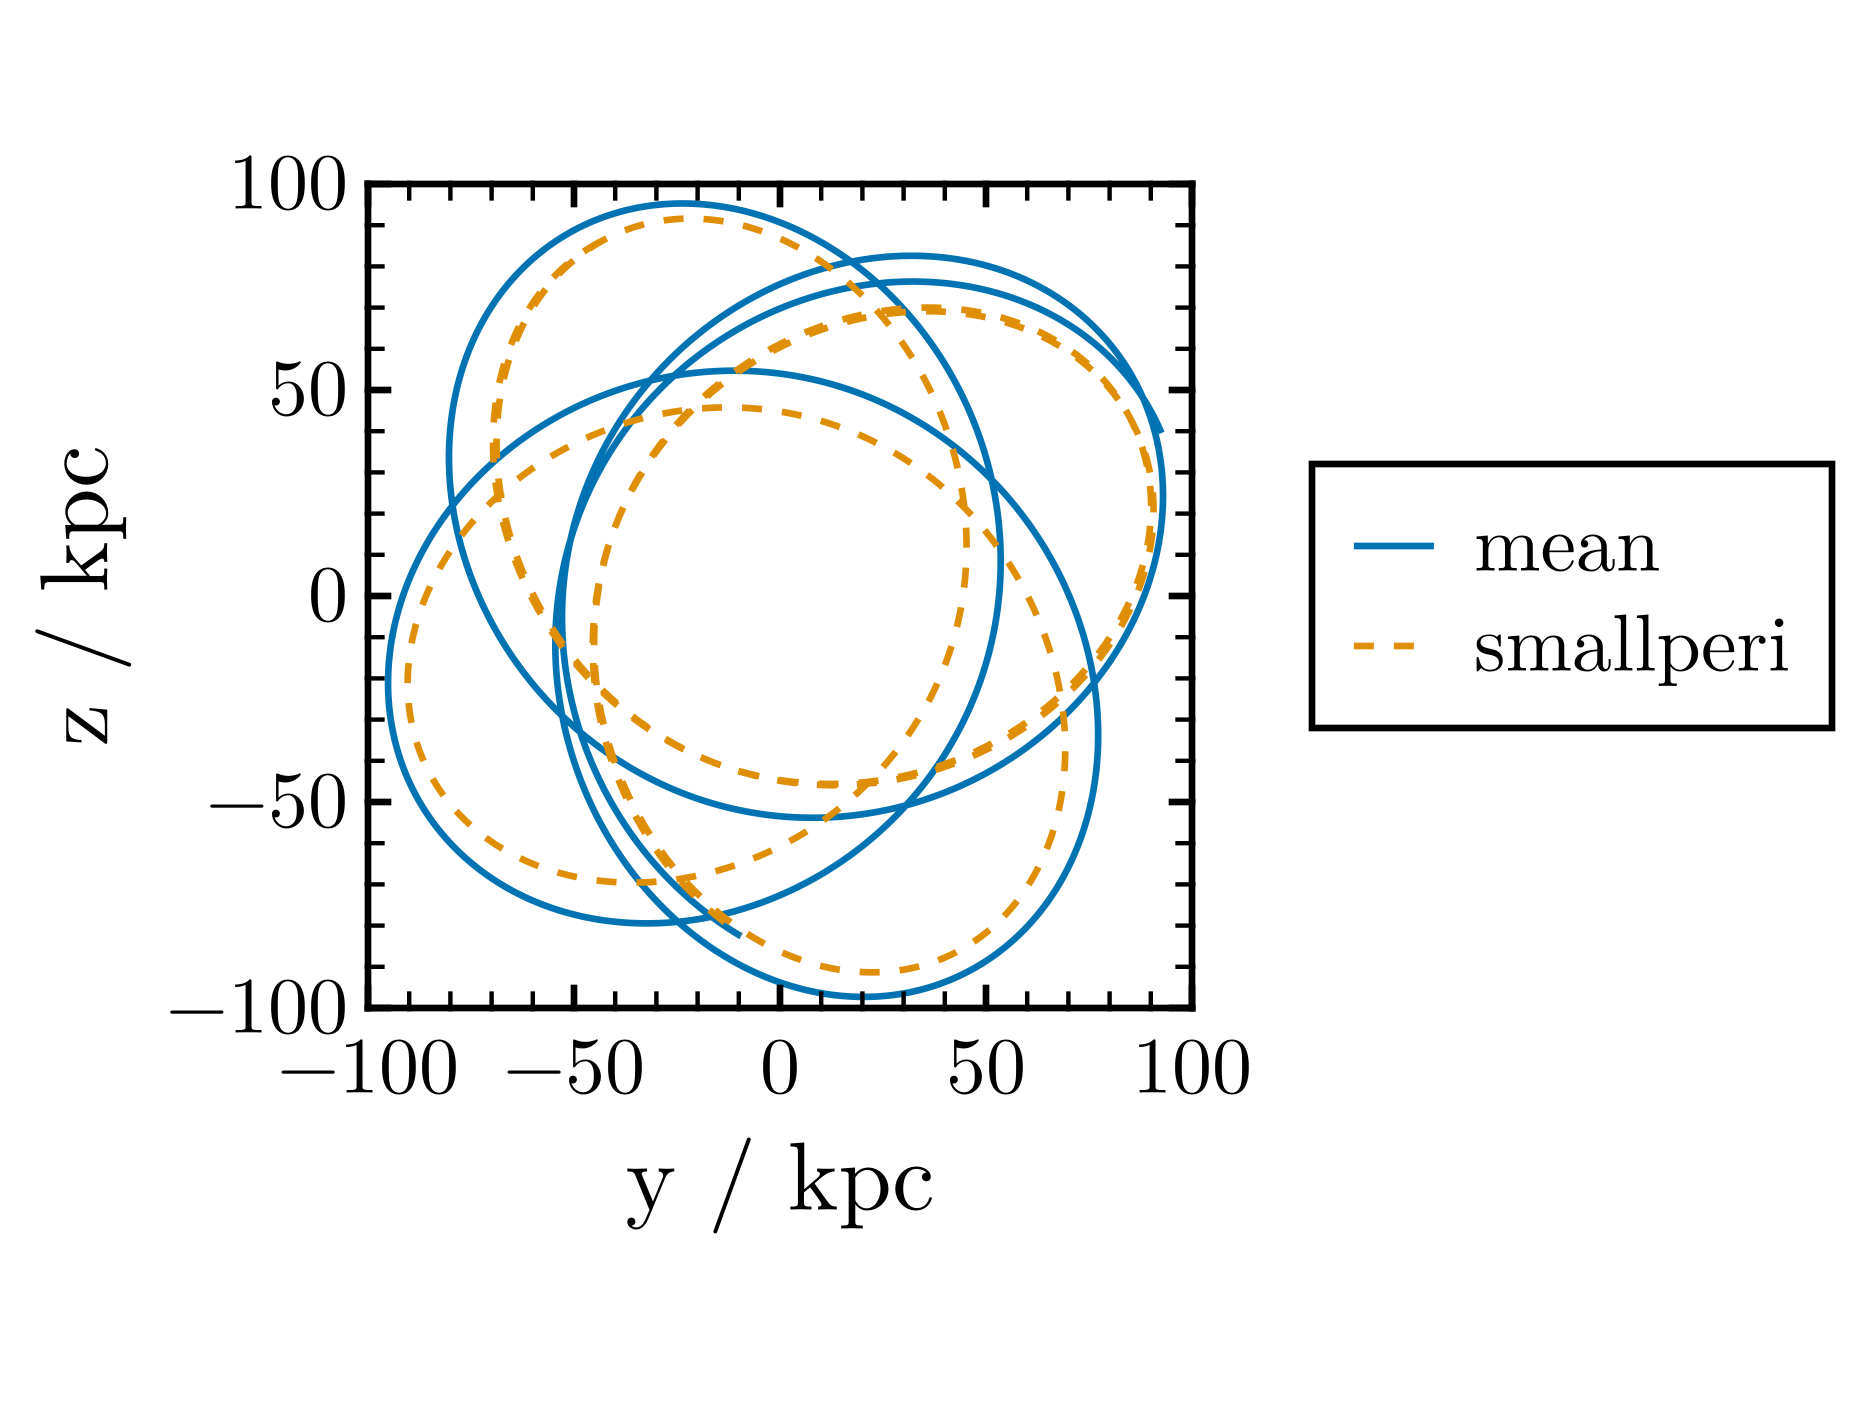

In [12]:
compare_orbits_2d(orbits, yname="z", xname="y", limits=(-100,100,-100,100))

In [13]:
orbits = [
    "mean" => load_orbit("sculptor/1e7_V31_r3.2/orbit_mean"),
    "smallperi" => load_orbit("sculptor/1e7_V31_r3.2/orbit_smallperi"),
    #"heavy" => load_orbit("sculptor/1e6_V40_r5.9/orbit_mean"),
    ];

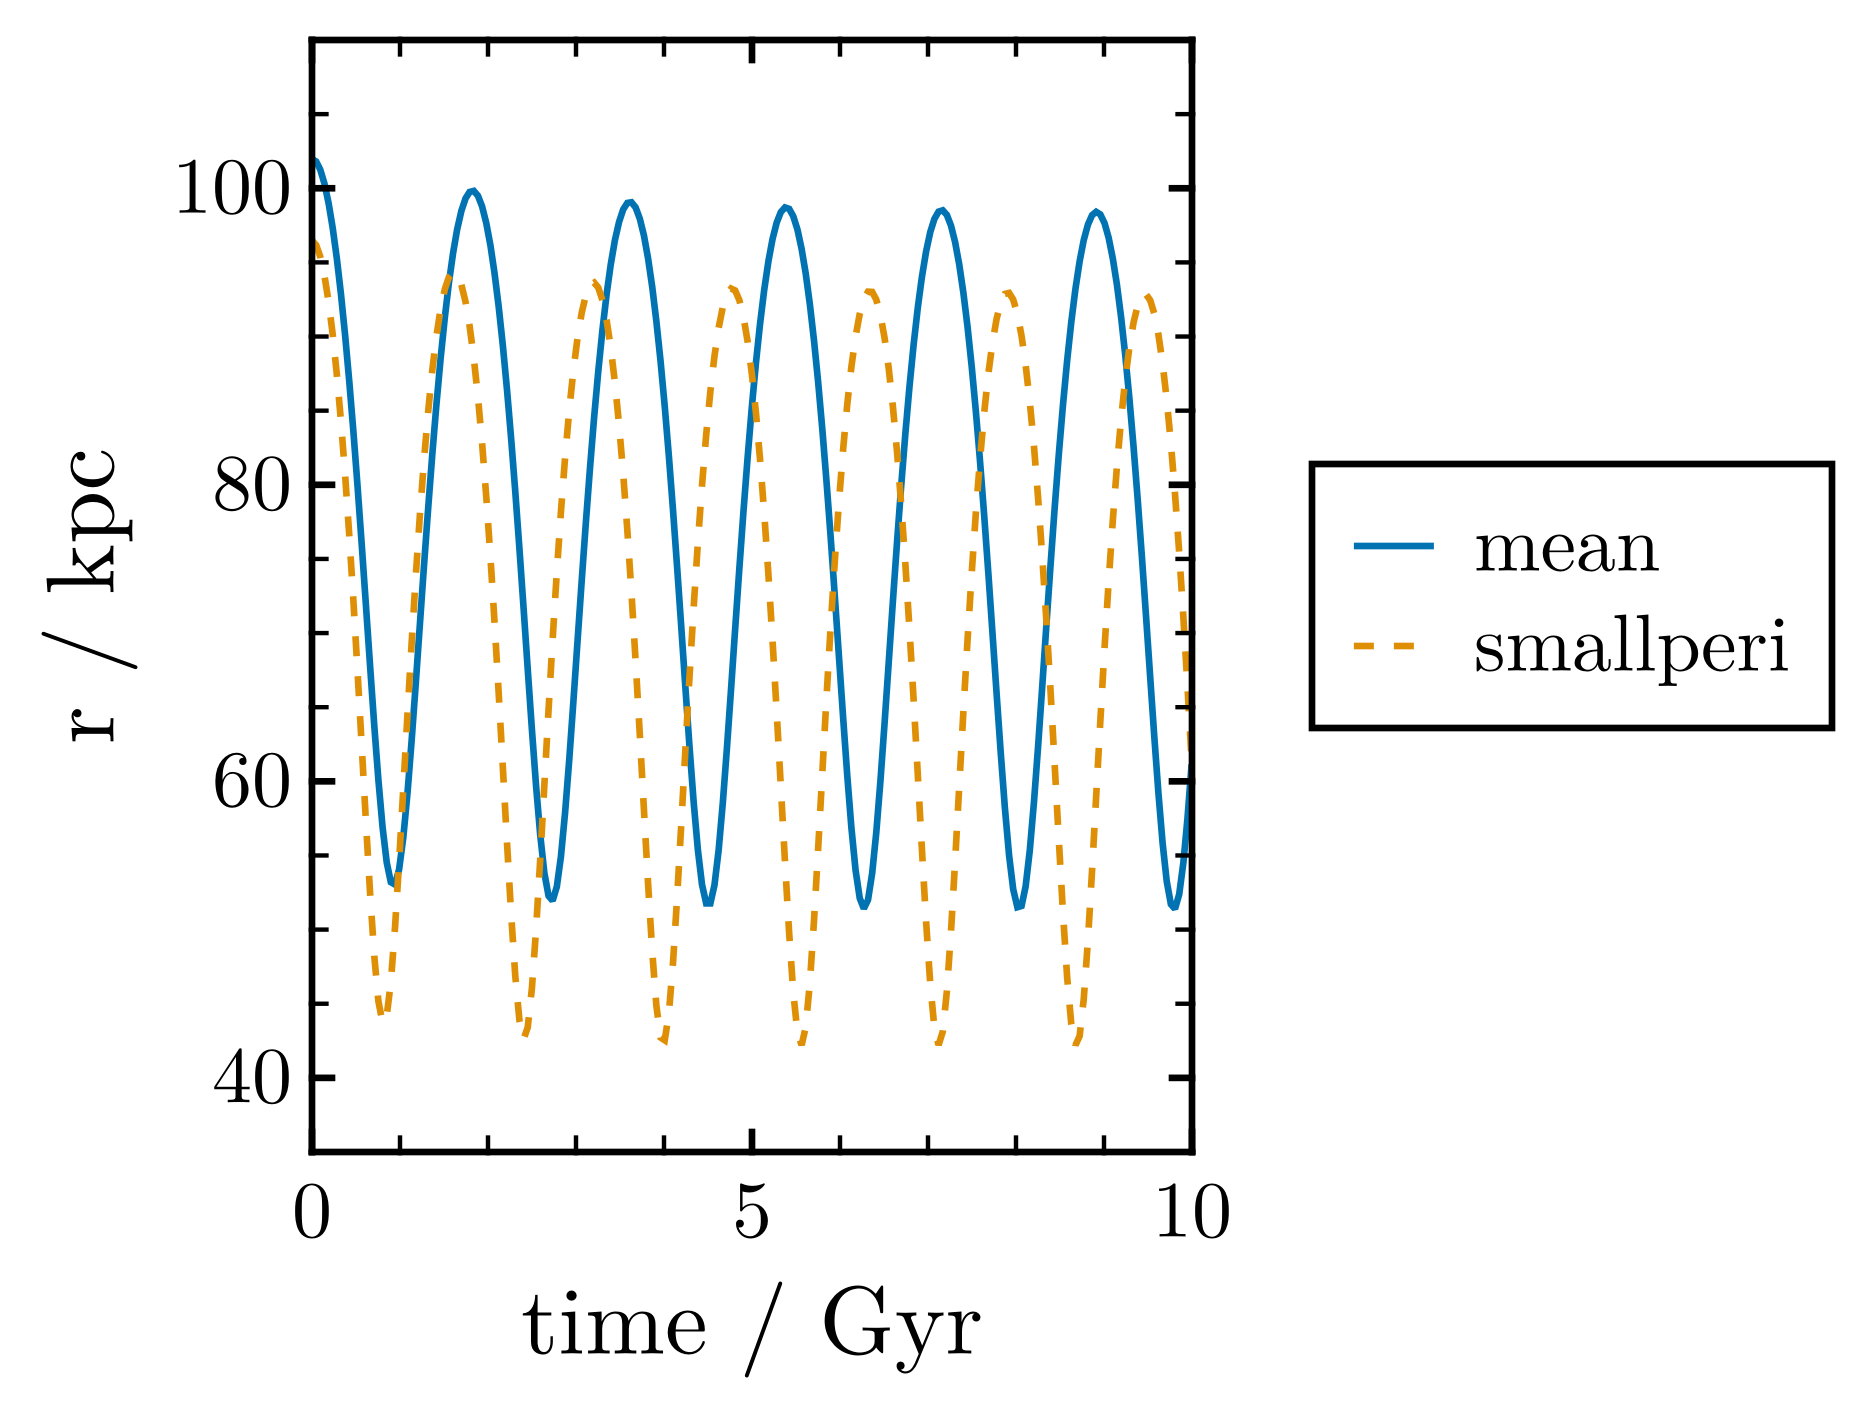

In [14]:
compare_orbits_2d(orbits, yname="r", xname="time", aspect=nothing, xunits="Gyr", limits=(0, 10, 35, 110))

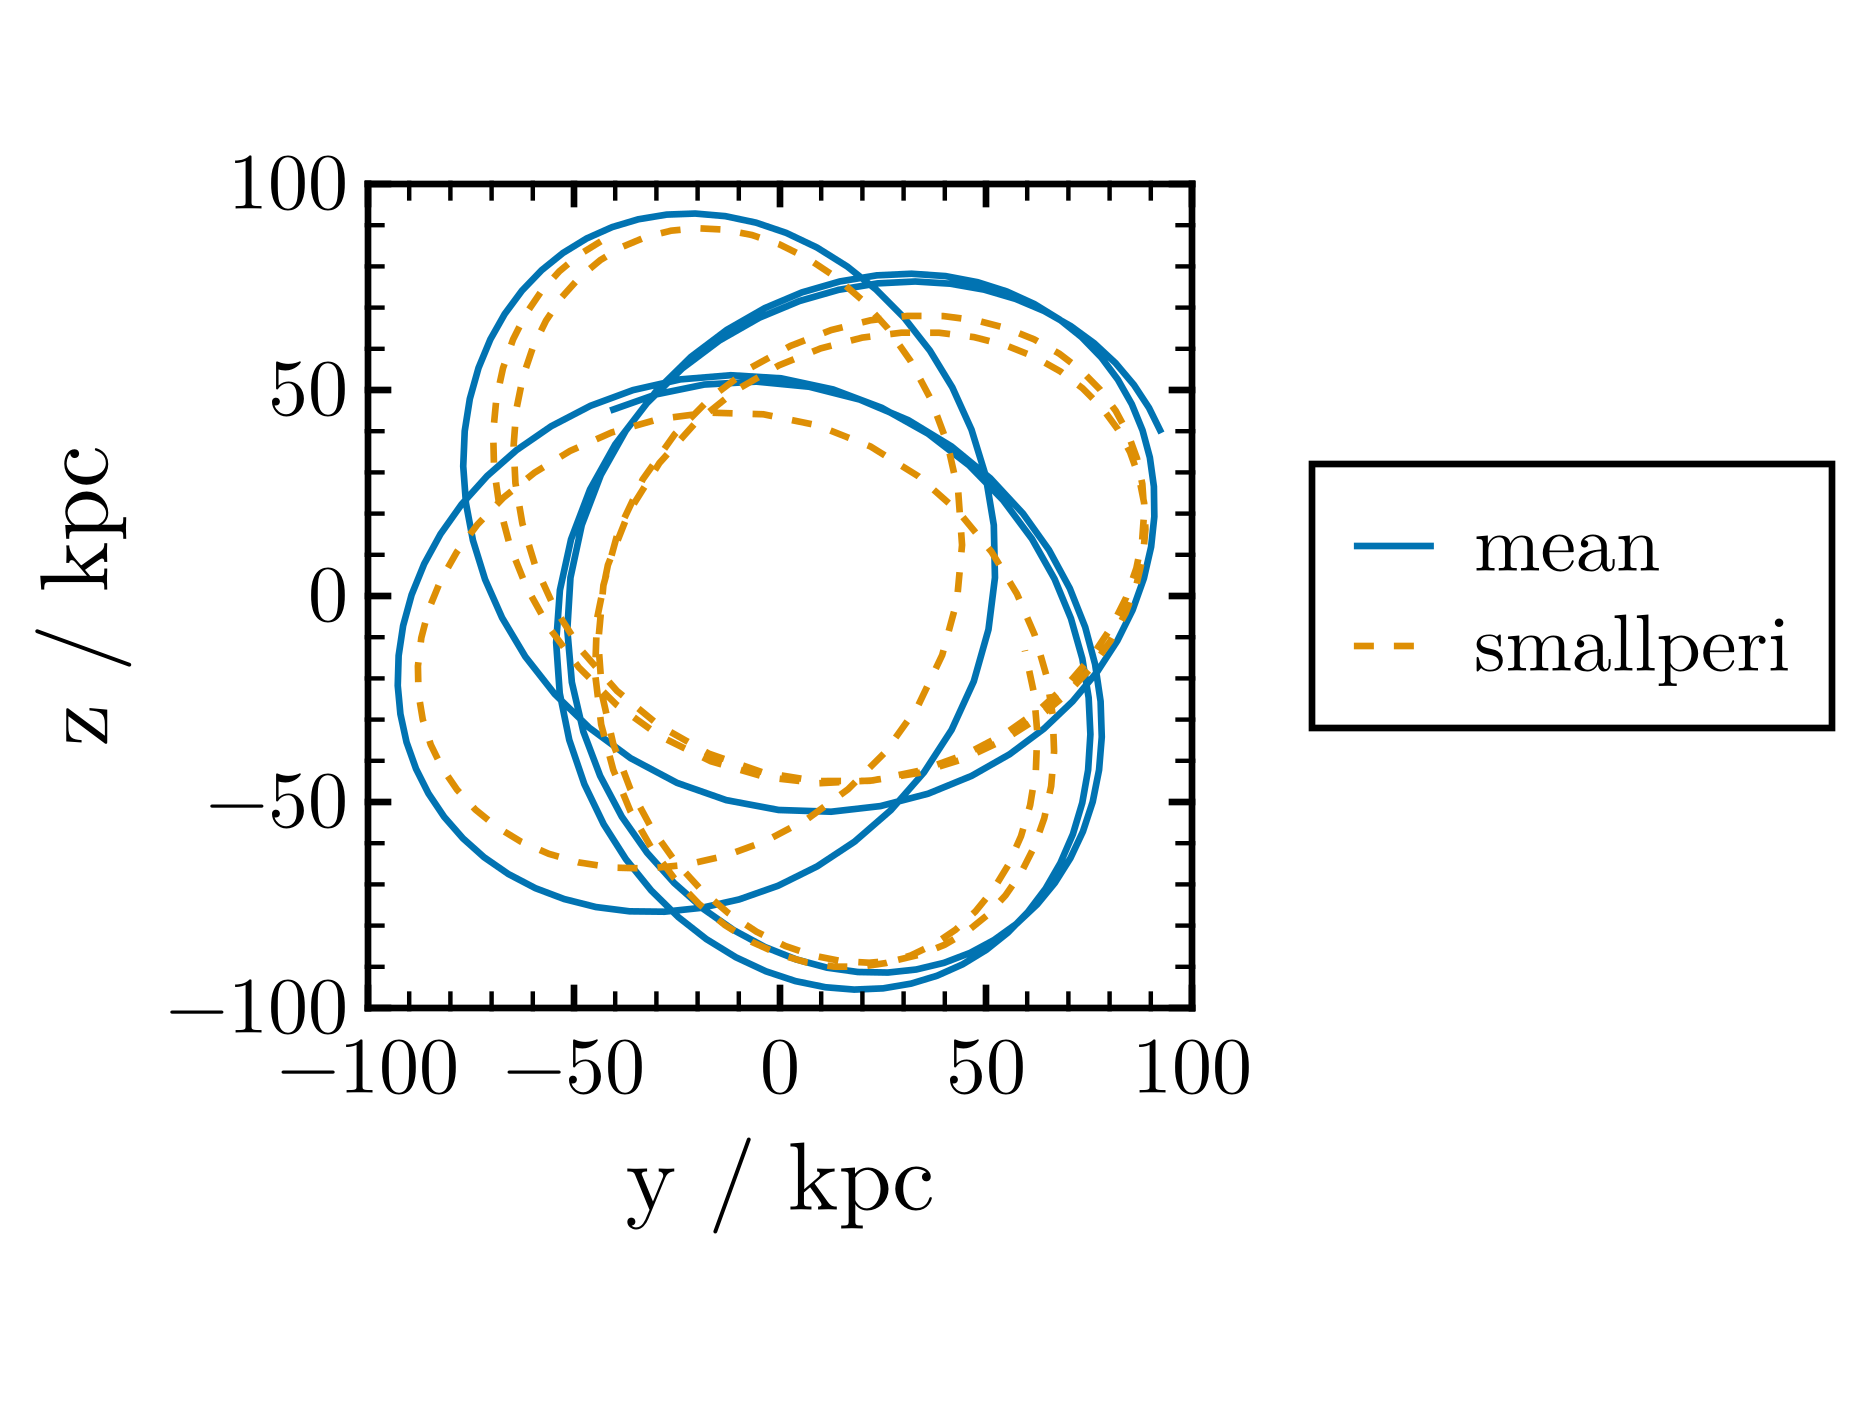

In [15]:
compare_orbits_2d(orbits, yname="z", xname="y", limits=(-100,100,-100,100))

In [ ]:
compare_orbits_2d(orbits, yname="z", xname="R")

In [ ]:
compare_orbits_2d(orbits, xname="time", xunits="Gyr", yname="r", aspect=nothing)